# TransactionSentinel: Prote√ß√£o inteligente contra fraudes em transa√ß√µes de cart√£o de cr√©dito.


* Este notebook apresenta a constru√ß√£o de um estudo e um modelo de ML para detec√ß√£o de fraudes em dados financeiros fict√≠cios, seguindo a metodologia CRISP-DM.

* A abordagem ser√° estruturada em cinco das seis etapas da metodologia. A etapa de Deploy (Implanta√ß√£o) n√£o ser√° totalmente executada; no entanto, o modelo ser√° salvo como se estivesse pronto para produ√ß√£o.
    * Etapas: 

        * **Compreens√£o do Neg√≥cio** ‚Äì Defini√ß√£o do problema e dos objetivos do projeto.

        * **Compreens√£o dos Dados** ‚Äì Explora√ß√£o inicial para entender a estrutura e qualidade dos dados.

        * **Prepara√ß√£o dos Dados** ‚Äì Tratamento, limpeza e transforma√ß√£o dos dados para a modelagem.

        * **Modelagem** ‚Äì Aplica√ß√£o de algoritmos de machine learning para detectar padr√µes de fraude.

        * **Avalia√ß√£o** ‚Äì Medi√ß√£o do desempenho do modelo para garantir sua efic√°cia.

        * **Deploy** (Implanta√ß√£o) ‚Äì Integra√ß√£o do modelo em um ambiente operacional para uso real.

# 1.Compreens√£o do Neg√≥cio

* A detec√ß√£o de fraudes em transa√ß√µes financeiras √© um desafio essencial para institui√ß√µes banc√°rias e operadoras de cart√µes de cr√©dito. A identifica√ß√£o eficiente de fraudes reduz perdas financeiras e protege clientes contra atividades fraudulentas.

* Objetivo do Projeto:

    * 1- Desenvolver uma an√°lise explorat√≥ria que forne√ßa informa√ß√µes sobre o comportamento dos eventos fraudulentos e n√£o fraudulentos. 

    * 2-Desenvolver um modelo de Machine Learning capaz de identificar transa√ß√µes fraudulentas com alto desempenho, garantindo um equil√≠brio entre seguran√ßa e experi√™ncia do usu√°rio.



        * O modelo ser√° avaliado com as seguintes m√©tricas:

        * **Recall ‚â• 70% ** ‚Äì Para minimizar a quantidade de fraudes n√£o detectadas.

        * ** AUC-ROC ‚â• 85% ** ‚Äì Para garantir uma boa distin√ß√£o entre transa√ß√µes leg√≠timas e fraudulentas.

        * ** F1-score ‚â• 74% ** ‚Äì Para garantir um bom equil√≠brio entre precis√£o e recall, considerando a import√¢ncia de minimizar tanto os falsos positivos quanto os falsos negativos.

* Restri√ß√µes de Neg√≥cio

    Para atender a requisitos e garantir um modelo confi√°vel:

    * Imparcialidade e Preven√ß√£o de Discrimina√ß√£o: 
    
        O modelo n√£o deve apresentar tend√™ncias discriminat√≥rias baseadas em atributos como g√™nero, idade, localiza√ß√£o ou outros fatores socioecon√¥micos. Se esse tipo de varivel for interessante ao evento em estudo, deve se aplicar transformacoes nessas variaveis para que seja mitigada chance de vies descriminativo, ex: idade pode ser transformada em faixas etarias, localizacao pode se tornar distancia entre residencia do titular e local do estabelecimento (verificando distancia de tempo entre duas ou mais transacoes) para identificar algum padrao nas fraudes. 

 


    * Explicabilidade e Transpar√™ncia

        O modelo deve ser interpret√°vel tanto globalmente quanto localmente, garantindo que especialistas possam entender seus crit√©rios de decis√£o. T√©cnicas como SHAP (SHapley Additive Explanations) e LIME (Local Interpretable Model-agnostic Explanations) ser√£o aplicadas para fornecer insights sobre as previs√µes do modelo.

* Escopo da Implanta√ß√£o
    * O modelo final ser√° salvo para futuras implementa√ß√µes, mas a fase de Deploy n√£o ser√° completamente executada neste estudo.



# 2.Compreens√£o dos Dados

In [1]:
#Bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
from scipy.stats import chi2_contingency
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score,average_precision_score
import optuna
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef

from category_encoders import WOEEncoder

from scipy.stats import ttest_ind


# T√©cnicas de oversampling
from imblearn.over_sampling import (
    SMOTE,               # SMOTE padr√£o
    ADASYN,              # SMOTE adaptativo
    BorderlineSMOTE,     # SMOTE focado na fronteira
    KMeansSMOTE          # SMOTE com KMeans
)

# T√©cnicas combinadas com undersampling
from imblearn.combine import (
    SMOTEENN,            # SMOTE + Edited Nearest Neighbors
    SMOTETomek           # SMOTE + Tomek Links
)


from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN




* Importando e conhecendo os dados inicialmente

In [2]:
############para Kaggle

# Load the training dataset
#train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv') 

# Load the testing dataset
#test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

# Display the first few rows of both datasets
#print("First 5 rows of the training dataset:")
#print(train_data.head())

#print("\nFirst 5 rows of the testing dataset:")
#print(test_data.head())


# Carregando arquivos em parquet
df_orig_train = pd.read_parquet('C:/Users/jgeov/OneDrive/Documentos/GitHub/Ciencia_de_dados-1/Fraud_detection/fraudTrain.parquet')
df_orig_test = pd.read_parquet('C:/Users/jgeov/OneDrive/Documentos/GitHub/Ciencia_de_dados-1/Fraud_detection/fraudTest.parquet')



In [3]:
print('df_treino dimens√µes:', f"{df_orig_train.shape[0]:,}".replace(',', '.') + ' linhas, ' + f"{df_orig_train.shape[1]:,}".replace(',', '.') + ' colunas')
print('')
print('df_teste dimens√µes:', f"{df_orig_test.shape[0]:,}".replace(',', '.') + ' linhas, ' + f"{df_orig_test.shape[1]:,}".replace(',', '.') + ' colunas')
print('')
print('Total de observa√ß√µes:', f"{df_orig_train.shape[0] + df_orig_test.shape[0]:,}".replace(',', '.'))


df_treino dimens√µes: 1.296.675 linhas, 23 colunas

df_teste dimens√µes: 555.719 linhas, 23 colunas

Total de observa√ß√µes: 1.852.394


In [4]:
# Se voc√™ quiser combin√°-los (por exemplo, por concatena√ß√£o)
df_total = pd.concat([df_orig_train, df_orig_test], ignore_index=True)

# Exibindo as primeiras linhas do DataFrame combinado

#configs para nao quebrar linhas no print do  df
pd.set_option('display.expand_frame_repr', False) 
pd.set_option('display.max_columns', None)


df_total.head(3)


Unnamed: 0 trans_date_trans_time            cc_num                         merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
0           0   2019-01-01 00:00:18  2703186189652095       fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1           1   2019-01-01 00:00:44      630423337322  fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2           2   2019-01-01 00:00:51    38859492057661             fraud_Lind-Buckridge  entertainment  220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0

In [5]:
#A coluna "Unnamed: 0" representa apenas a contagem dos datasets de treino e teste. Ao concaten√°-los para a compreens√£o dos dados, essa coluna foi duplicada.
#Como se trata apenas de um √≠ndice sem valor informativo para a an√°lise, e n√£o ser√° utilizada em nenhuma etapa do estudo, ela ser√° removida j√° nesta fase.
df_total.sort_values(by="Unnamed: 0", ascending=True).head(5)


Unnamed: 0 trans_date_trans_time            cc_num                         merchant       category     amt      first      last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
1296675           0   2020-06-21 12:14:25  2291163933867244            fraud_Kirlin and Sons  personal_care    2.86       Jeff   Elliott      M             351 Darlene Green        Columbia    SC  29209  33.9659  -80.9355    333497                Mechanical engineer  1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714         0
0                 0   2019-01-01 00:00:18  2703186189652095       fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer     Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1296676           1   2020-06-21 12:14:33  3573030041201292             fraud_Sporer-Keebler  personal_care   29.84     Joanne  Williams      F              3638 Marsh Union         Altonah    UT  84002  40.3207 -110.4360       302             Sales professional, IT  1990-01-17  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431         0
1                 1   2019-01-01 00:00:44      630423337322  fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie      Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2                 2   2019-01-01 00:00:51    38859492057661             fraud_Lind-Buckridge  entertainment  220.11     Edward   Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0

In [6]:
#removendo 
df_total = df_total.drop(columns=["Unnamed: 0"])

#resetando indice (morrer de certeza, depois da concatenacao pode ter duplicado tambem em algum ponto)
df_total = df_total.reset_index(drop=True)

#ordenando os dados pelo indice
df_total = df_total.sort_index(ascending=True)


df_total.head(5)


trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment  220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306 -112.1138      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071         0
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459         0

In [7]:
print('df_total dimesoes:',df_total.shape) #comparacao com soma dos dfs de treino e teste (soma bate) ok

df_total dimesoes: (1852394, 22)


In [8]:
#cnhecendo as colunas e tipos de dados
print(df_total.columns)
print("")
print(df_total.dtypes)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud              

In [9]:
#checando os valores null em cada variavel 

#checando se h√° valores nulos 
df_total.isnull().sum()  
#valores nulos nao encontrados 

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
#contando a quantidade de zeros em cada coluna para verificar se elas tem 
# informacao suficiente para entrar no modelo futuramente

for col in df_total.columns:
    zero_count = (df_total[col] == 0).sum()
    print("")
    print(f" '{col}': {zero_count} valores zero")

    #nenhuma variavel contem valores zerados, a nao ser a variavel alvo,
    #  e aqui ja podemos ver que se trata de um estudo de enventos raros realmente. 




 'trans_date_trans_time': 0 valores zero

 'cc_num': 0 valores zero

 'merchant': 0 valores zero

 'category': 0 valores zero

 'amt': 0 valores zero

 'first': 0 valores zero

 'last': 0 valores zero

 'gender': 0 valores zero

 'street': 0 valores zero

 'city': 0 valores zero

 'state': 0 valores zero

 'zip': 0 valores zero

 'lat': 0 valores zero

 'long': 0 valores zero

 'city_pop': 0 valores zero

 'job': 0 valores zero

 'dob': 0 valores zero

 'trans_num': 0 valores zero

 'unix_time': 0 valores zero

 'merch_lat': 0 valores zero

 'merch_long': 0 valores zero

 'is_fraud': 1842743 valores zero


# 2.1 Analisando e Descrevendo: An√°lise Explorat√≥ria (EDA)


* Dicionario de dados e acoes previamente ja determinadas de acordo com a natureza da varivel. 
* O oficial nao foi divulgado, entao com base no nome das variaveis foi determinado: 



| **Nome da Vari√°vel**        | **Descri√ß√£o**                                                                 | **Transforma√ß√£o Necess√°ria** |
|-----------------------------|-------------------------------------------------------------------------------|-----------------------------|
| **trans_date_trans_time**    | Data e hora da transa√ß√£o (`yyyy-mm-dd hh:mm:ss`).                            | Extrair hora, dia da semana, m√™s, periodo da transacao etc.|
| **cc_num** | N√∫mero do cart√£o de cr√©dito utilizado na transa√ß√£o.<br> Pode ser √∫til para identificar padr√µes de uso suspeitos e anomalias.<br> Contudo, √© um dado sens√≠vel e deve ser tratado para garantir conformidade com normas de privacidade. |  Extrair padr√µes relevantes, como:<br>  - Extrair primeiros d√≠gitos (BIN) que identificam o banco das transa√ß√µes <br>  - Contagem de transa√ß√µes por cart√£o em um per√≠odo de tempo. <br> - Contagem de vezes que o cartao foi usado|
| **merchant**                 | Nome do comerciante.                                                          |  |
| **category**                 | Categoria da transa√ß√£o (`misc_net`, `grocery_pos`, etc.).                     |  |
| **amt**                      | Valor da transa√ß√£o.                                                           |  |
| **first**                    | Primeiro nome do titular.                                                     | Remover (Irrelevante). |
| **last**                     | Sobrenome do titular.                                                         | Remover (Irrelevante). |
| **gender**                   | G√™nero do titular (`F` ou `M`).                                               | Remover (Poss√≠vel vi√©s discriminat√≥rio).|
| **street**                   | Endere√ßo do titular.                                                          | Remover (Irrelevante). |
| **city**                     | Cidade do titular.                                                            | Remover (J√° h√° `lat` e `long`). |
| **state**                    | Estado do titular.                                                            | Remover (J√° h√° `lat` e `long`). |
| **zip**                      | C√≥digo postal (CEP).                                                          | Remover (J√° h√° `lat` e `long`). |
| **lat**                      | Latitude da localiza√ß√£o do titular.                                           |  |
| **long**                     | Longitude da localiza√ß√£o do titular.                                          |  |
| **city_pop**                 | Popula√ß√£o da cidade do titular.                                               |  |
| **job**                      | Profiss√£o do titular.                                                         |  |
| **dob**                      | Data de nascimento (`yyyy-mm-dd`).                                            | Converter para idade. |
| **trans_num**                | Identificador √∫nico da transa√ß√£o.                                             | Remover (Irrelevante). |
| **unix_time**                | Timestamp Unix (segundos desde 1970).                                         | Remover - reduntande ja temos trans_date_trans_time  |
| **merch_lat**                | Latitude da localiza√ß√£o do comerciante.                                       |  |
| **merch_long**               | Longitude da localiza√ß√£o do comerciante.                                      |  |
| **is_fraud**                 | Indicador de fraude (`1` = fraudulenta, `0` = leg√≠tima).                      | **Vari√°vel alvo** |



In [11]:
print(df_total.dtypes)

df_anl_num = df_total.select_dtypes(include=[np.number])

pd.options.display.float_format = '{:.2f}'.format  # config 2 casas decimais para configurar o describe
df_anl_num.describe()

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


cc_num        amt        zip        lat       long   city_pop     unix_time  merch_lat  merch_long   is_fraud
count             1852394.00 1852394.00 1852394.00 1852394.00 1852394.00 1852394.00    1852394.00 1852394.00  1852394.00 1852394.00
mean   417386038393710400.00      70.06   48813.26      38.54     -90.23   88643.67 1358674218.83      38.54      -90.23       0.01
std   1309115265318734848.00     159.25   26881.85       5.07      13.75  301487.62   18195081.39       5.11       13.76       0.07
min           60416207185.00       1.00    1257.00      20.03    -165.67      23.00 1325376018.00      19.03     -166.67       0.00
25%       180042946491150.00       9.64   26237.00      34.67     -96.80     741.00 1343016823.75      34.74      -96.90       0.00
50%      3521417320836166.00      47.45   48174.00      39.35     -87.48    2443.00 1357089331.00      39.37      -87.44       0.00
75%      4642255475285942.00      83.10   72042.00      41.94     -80.16   20328.00 1374581485.25      41.96      -80.25       0.00
max   4992346398065154048.00   28948.90   99921.00      66.69     -67.95 2906700.00 1388534374.00      67.51      -66.95       1.00

* Verificando relacao entre a variavel alvo e as variaveis explicativas numericas
    * sem muita correlacao inicialmente 

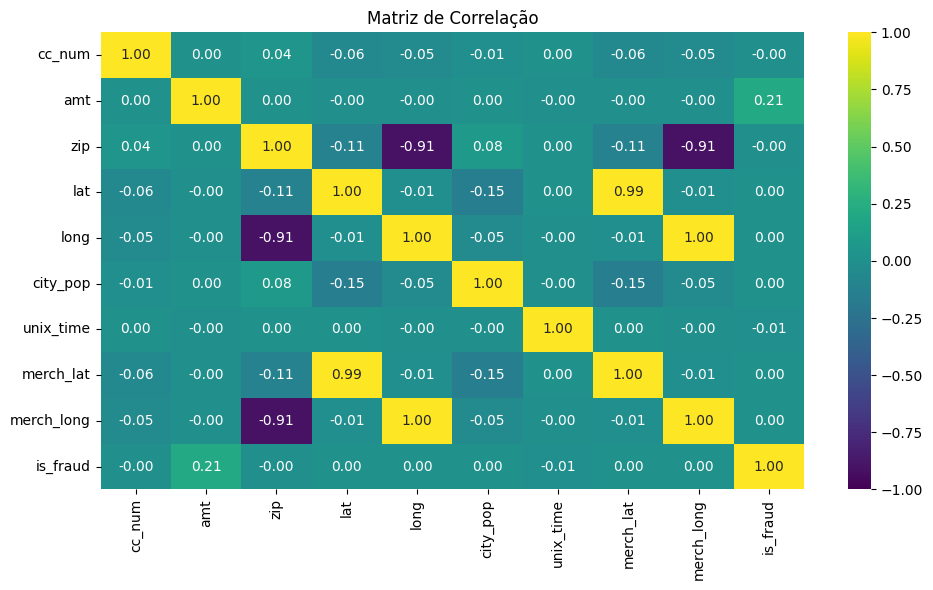

In [12]:
# Suprimir todos os warnings
warnings.filterwarnings("ignore")

# Criar a figura com 1 subgr√°fico (apenas o gr√°fico de correla√ß√£o)
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# 1. Gr√°fico de Correla√ß√£o (Matriz de Correla√ß√£o)
sns.heatmap(df_anl_num.corr(), annot=True, cmap="viridis", fmt=".2f", ax=axes, vmin=-1, vmax=1)
axes.set_title('Matriz de Correla√ß√£o')

# Ajustar o layout
plt.tight_layout()
plt.show()




* Verificando relacao entre a variavel alvo e as variaveis explicativas categoricas ("frequencias")
    * Aqui ja podemos ver como se trata de um evento raro; 
    * as cateogrias de compras (variavel category) com "_net" sao de transacoes de compra online, as "_pos" sao trasacoes de compra presenciais. Elas detem a maioria das fraudes dentre as categorias, o que √© naturalmente compreensivel. 

In [13]:
df_anl_cat = df_total.select_dtypes(include=['object']) #df so de categoricas elegiveis para analise (APENAS ANALISE)
df_anl_cat.head(5)


trans_date_trans_time                            merchant       category      first     last gender                        street            city state                                job         dob                         trans_num
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46

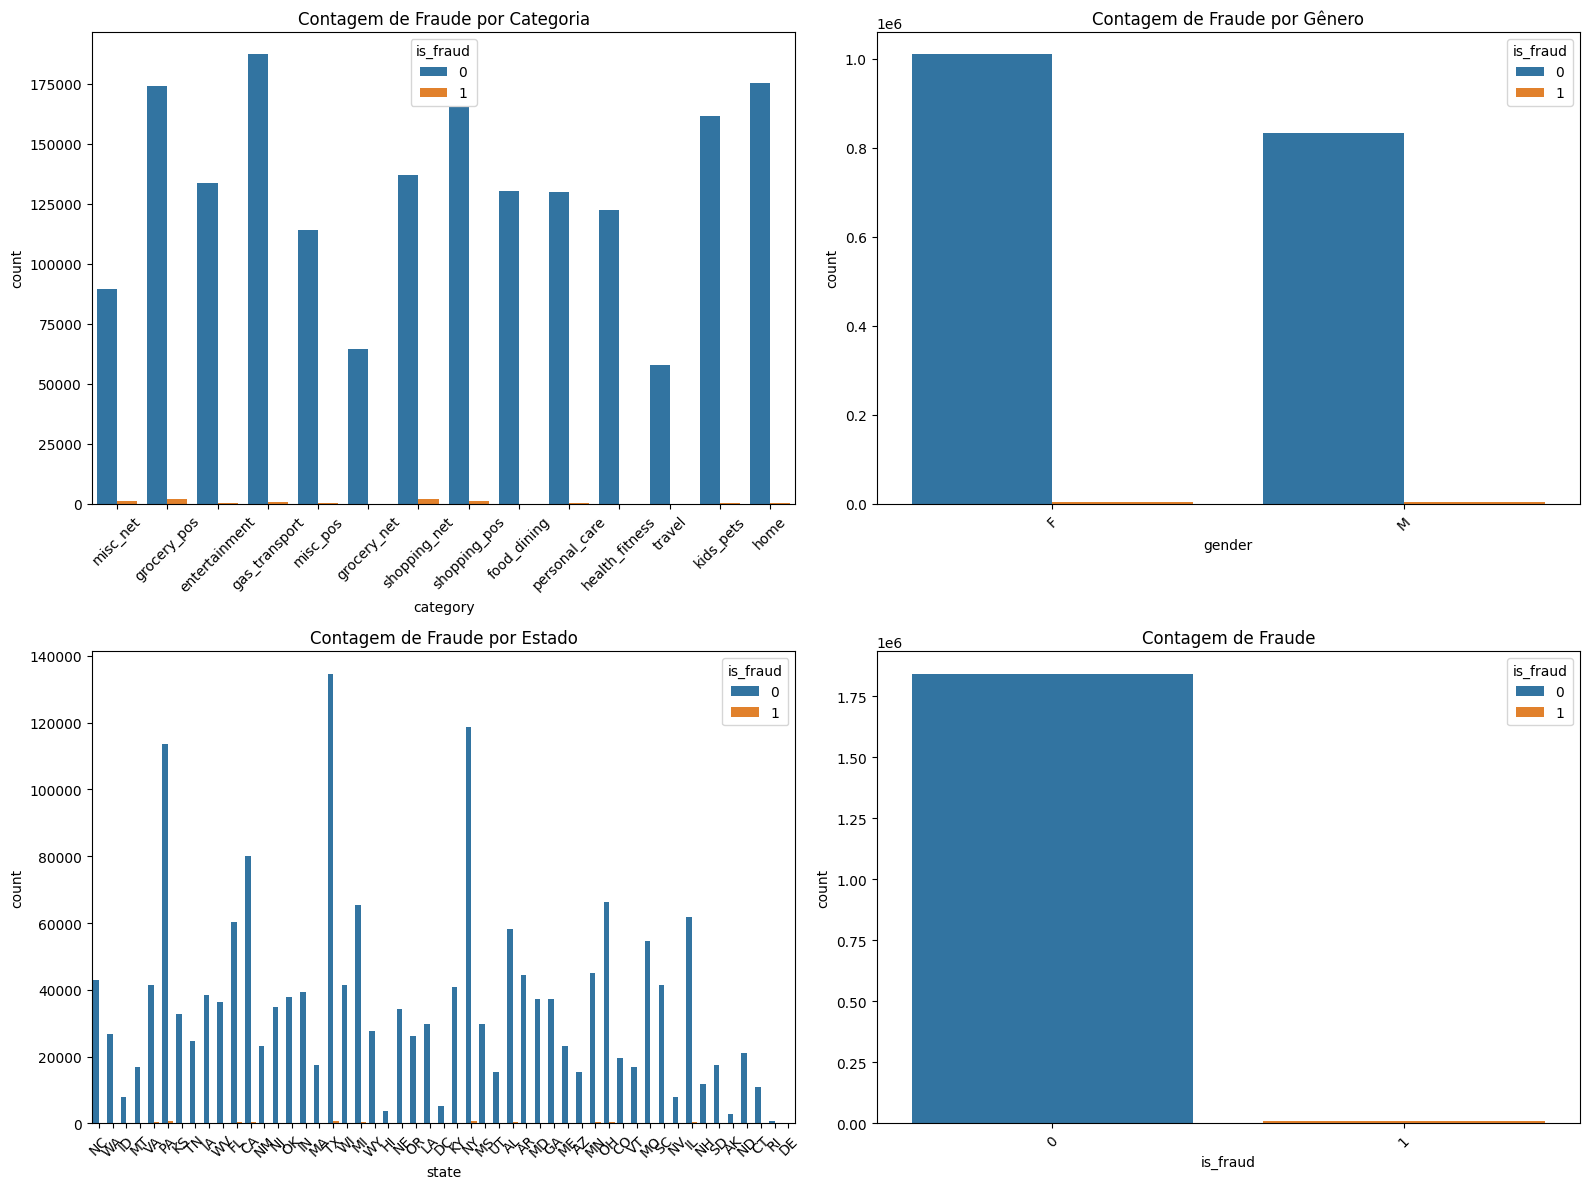

In [14]:
df_anl_cat = df_total[['category','gender','state','is_fraud']] #df so de categoricas elegiveis para analise (APENAS ANALISE)


# Criar a figura com 3 subgr√°ficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gr√°fico de contagem para a vari√°vel 'category'
sns.countplot(data=df_anl_cat, x='category', hue='is_fraud', ax=axes[0, 0])
axes[0, 0].set_title('Contagem de Fraude por Categoria')

# 2. Gr√°fico de contagem para a vari√°vel 'gender'
sns.countplot(data=df_anl_cat, x='gender', hue='is_fraud', ax=axes[0, 1])
axes[0, 1].set_title('Contagem de Fraude por G√™nero')

# 3. Gr√°fico de contagem para a vari√°vel 'state'
sns.countplot(data=df_anl_cat, x='state', hue='is_fraud', ax=axes[1, 0])
axes[1, 0].set_title('Contagem de Fraude por Estado')

# 3. Gr√°fico de contagem para a vari√°vel 'state'
sns.countplot(data=df_anl_cat, x='is_fraud', hue='is_fraud', ax=axes[1, 1])
axes[1, 1].set_title('Contagem de Fraude')

# Aplicar rota√ß√£o de 45 graus em todos os r√≥tulos do eixo x
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)  # Rotaciona os r√≥tulos do eixo x para 45 graus

# Ajustar layout
plt.tight_layout()

# Exibir o gr√°fico
plt.show()



* Verificando a relacao entre as variaveis numericas explicativas (sem variavel alvo)
    * Vemos um agrupamento em valores pequenos para ambas variaveis;
    * embora a variavel alvo esteja na legenda, √© meramente para vermos onde se encontrar as observacoes de fraude entre as variaveis, nao e muito conclusivo mas da uma ideia de onde se "agrupam" em termos de valores

In [15]:
# Cria o pairplot
g = sns.pairplot(
    df_anl_num[['amt','city_pop','is_fraud','zip']], 
    hue='is_fraud',
    diag_kind='kde',
    height=2.5,
    aspect=1.2,
    plot_kws={'alpha': 0.3}
)

# Formata os eixos 
for ax in g.axes.flatten():
    # Formata√ß√£o(sem nota√ß√£o cient√≠fica automatica)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.tick_params(axis='x', rotation=45) # eixo x em 45 graus

    plt.tight_layout()

plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000017D5EC2A200> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

* Verificando a relacao entre as variaveis explicativas categoricas (sem variavel alvo)
    * Aqui verificamos se ha associacao estatistica entre as variveis cetegoricas (sem a alvo) pelo teste de Qui2
    * Verificamos e classificamos em baixa media e alta a forca das associaicoes entre as variaveis categoricas, e plotamos os resultados pelo heatmap de V de Cramer tambem. 

In [ ]:
# df_ de categoricas sem a variavel alvo
df_cat = df_anl_cat[['category', 'gender', 'state']]

def cramers_v(x, y):
    """Calcula o V de Cramer entre duas vari√°veis categ√≥ricas."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Fun√ß√£o para categorizar a for√ßa do V de Cramer
def categorize_cramers_v(value):
    if value < 0.10:
        return "Baixa For√ßa de"
    elif value < 0.30:
        return "M√©dia For√ßa de"
    else:
        return "Alta For√ßa de"

# Inicializa um DataFrame para armazenar os resultados
results = pd.DataFrame(index=df_cat.columns, columns=df_cat.columns)

for col1 in df_cat.columns:
    for col2 in df_cat.columns:
        if col1 == col2:
            results.loc[col1, col2] = 1.0  # Correla√ß√£o perfeita com ela mesma
        else:
            table = pd.crosstab(df_cat[col1], df_cat[col2])
            chi2, p, _, _ = chi2_contingency(table)
            v_cramer = cramers_v(df_cat[col1], df_cat[col2])

            # Interpreta√ß√£o do p-valor
            significance = "h√° evid√™ncia de associa√ß√£o" if p < 0.05 else "n√£o h√° evid√™ncia de associa√ß√£o"
            
            # Classifica√ß√£o da for√ßa do V de Cramer
            strength = categorize_cramers_v(v_cramer)

            print(f'Teste Qui-Quadrado entre {col1} e {col2}:')
            print(f'Qui¬≤={chi2:.2f}, p-valor={p:.4f} ({"menor" if p < 0.05 else "maior"} que 0.05, {significance}).')
            print(f'V de Cramer={v_cramer:.2f} ({strength} associa√ß√£o)\n')

            results.loc[col1, col2] = v_cramer


# Converte os valores para float
results = results.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, cmap='viridis', fmt='.2f', vmin=0, vmax=1)
plt.title('Heatmap do V de Cramer entre Vari√°veis Categ√≥ricas')
plt.show()




* Aqui evidencia-se o desbalance das classes da variavel alvo, trata-se de um evento raro, conforme ja haviam indicios. 

In [ ]:
# Contar a quantidade de cada classe
fraud_counts = df_total["is_fraud"].value_counts()

# Criar o gr√°fico de pizza
plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(
    fraud_counts, labels=["N√£o Fraude", "Fraude"], 
    colors=["green", "red"], startangle=90, wedgeprops={"edgecolor": "black"}
)

# Adicionar os percentuais e contagens formatadas
for i, (text, pct) in enumerate(zip(texts, fraud_counts / fraud_counts.sum() * 100)):
    count_formatted = f"{fraud_counts.iloc[i]:,}".replace(",", ".")
    text.set_text(f"{text.get_text()} ({pct:.2f}%) - {count_formatted}")

# Adicionar t√≠tulo
plt.title("Distribui√ß√£o da Vari√°vel-Alvo (is_fraud)", fontsize=14, fontweight="bold")

# Mostrar o gr√°fico
plt.show()


* Verificando localizacao das transacoes e dos titulares dos cartoes 
    * Aqui foi dado foco nos maiores ofensores de fraudes: as variaveis de compra presencial "_pos" e online "_net" pois apresentaram grande parte das fraudes 
    * Ha maior concentracao de transacoes do lado da Costa Leste 
    * Existem transacoes no Havai, Canad√° e no Alasca, mas sao em pequenos volumes, ainda assim sao estranhas(principalemnte Alasca). 

In [ ]:
# Filtrar apenas transa√ß√µes fraudulentas E que sejam online (_net)
df_fraude_net = df_total[(df_total["is_fraud"] == 1) & (df_total["category"].str.contains("_net", na=False))]

# Criar um DataFrame com as coordenadas SOMENTE de fraudes online
df_mapa = pd.DataFrame({
    "Latitude": list(df_fraude_net["lat"]) + list(df_fraude_net["merch_lat"]),
    "Longitude": list(df_fraude_net["long"]) + list(df_fraude_net["merch_long"]),
    "Tipo": ["Titular"] * len(df_fraude_net) + ["Estabelecimento"] * len(df_fraude_net)
})

# Amostrar 50% para evitar sobrecarga (ajuste conforme volume de dados)
df_mapa_sample = df_mapa.sample(frac=0.5, random_state=42) if len(df_mapa) > 1000 else df_mapa

# Criar o mapa com os pontos das fraudes online
fig = px.scatter_mapbox(df_mapa_sample, lat="Latitude", lon="Longitude",
                        color="Tipo",  
                        mapbox_style="carto-positron",
                        zoom=3, 
                        color_discrete_map={"Titular": "orange", "Estabelecimento": "blue"}  # Define cores personalizadas
                        )

# Ajustar layout com margem superior maior para exibir o t√≠tulo
fig.update_layout(
    width=1700,  
    height=700,  
    margin={"r":0, "t":50, "b":0, "l":0},
    title={
        "text": "AMOSTRA de Distribui√ß√£o das Transa√ß√µes Fraudulentas ONLINE por Localiza√ß√£o do Titular e Estabelecimento",
        "x": 0.5,  # Centraliza o t√≠tulo
        "xanchor": "center",  # Garante alinhamento centralizado
        "yanchor": "top",
        "font": {"size": 20, "family": "Arial Black"}  # Aumenta o tamanho e deixa em negrito
    }
)


fig.show()


In [ ]:
# Filtrar apenas transa√ß√µes fraudulentas E que sejam presenciais (_pos)
df_fraude_net = df_total[(df_total["is_fraud"] == 1) & (df_total["category"].str.contains("_pos", na=False))]

# Criar um DataFrame com as coordenadas SOMENTE de fraudes presenciais
df_mapa = pd.DataFrame({
    "Latitude": list(df_fraude_net["lat"]) + list(df_fraude_net["merch_lat"]),
    "Longitude": list(df_fraude_net["long"]) + list(df_fraude_net["merch_long"]),
    "Tipo": ["Titular"] * len(df_fraude_net) + ["Estabelecimento"] * len(df_fraude_net)
})

# Amostrar 50% para evitar sobrecarga (ajuste conforme volume de dados)
df_mapa_sample = df_mapa.sample(frac=0.5, random_state=42) if len(df_mapa) > 1000 else df_mapa

# Criar o mapa com os pontos das fraudes presenciais, definindo cores espec√≠ficas
fig = px.scatter_mapbox(df_mapa_sample, lat="Latitude", lon="Longitude",
                        color="Tipo",  
                        mapbox_style="carto-positron",
                        zoom=3,
                        color_discrete_map={"Titular": "orange", "Estabelecimento": "blue"}  # Define cores personalizadas
)

# Ajustar layout
fig.update_layout(
    width=1700,  
    height=700,  
    margin={"r":0, "t":50, "b":0, "l":0},
    title={
        "text": "AMOSTRA de Distribui√ß√£o das Transa√ß√µes Fraudulentas PRESENCIAIS por Localiza√ß√£o do Titular e Estabelecimento",
        "x": 0.5,  
        "xanchor": "center",  
        "yanchor": "top",
        "font": {"size": 20, "family": "Arial Black"}  
    }
)

fig.show()


# 3 Prepara√ß√£o dos Dados: Feature Engineering


* estudar a criacao de uma variavel que identifica a distancia (se e anormal) entre duas transacoes, acho que usar o racional da variavel de contagem de vezes que o cartao foi usado na ultima hora (trans_count_last_hour) 
ex: uma transacao feita presencialemnte seguida de outra presencialmente em locais muito distantes em 1 hora (ou outro periodo se for o caso) podem indicar uma possivel fraude

* criando variavel de distancia em Km entre estabeleciemnto e titular do cartao para compras presencias. 
    * Foi usada a dist√¢ncia entre os pontos pela f√≥rmula de Haversine, pois ela considera a curvatura da Terra e retorna a dist√¢ncia real em km, diferentemente da Euclidiana, que assume um espa√ßo plano (2D) e n√£o converte diretamente em quil√¥metros.

In [16]:
# Fun√ß√£o para remover vari√°veis desnecessarias
def Limpa_df(df, colunas_para_excluir):
    df = df.drop(columns=colunas_para_excluir, errors='ignore')  # ignora colunas que n√£o existem
    #df = df.dropna()  # remove linhas com valores ausentes
    return df




def mover_target_para_final(df, target):
    """
    Move a variavel alvo para o final do df

    Isso nao interfere em resultados, e para manter o padrao de legibilidade e facilitar a visualizacao da target
    """
    colunas = [col for col in df.columns if col != target] + [target]
    return df[colunas]



In [17]:
# criando variavel de distancia em Km entre estabeleciemnto e titular do cartao para compras presencias (nao faz sentido para compras online que podem e muito provavlemente sera, bem distantes)
#essa variavel permitira entender se a compra presencial foi muito distante do local do titular do cartao, podendo indicar possivel fraude, isso sera estudado


# Definindo as categorias presenciais
categorias_presenciais = [
    "misc_pos", "grocery_pos", "gas_transport", 
    "shopping_pos", "personal_care", "health_fitness"
]


# Fun√ß√£o para calcular dist√¢ncia Haversine em KM
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Raio m√©dio da Terra em km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Aplicar linha a linha
# eliminando caso ja tenha 
#if 'distancia_km' in df_total.columns:
#    df_total = df_total.drop(columns='distancia_km')

df_total["distancia_km"] = df_total.apply(
    lambda row: haversine(row["lat"], row["long"], row["merch_lat"], row["merch_long"])
    if row["category"] in categorias_presenciais else np.nan,
    axis=1
)

#trata NAN 
df_total["distancia_km"] = df_total["distancia_km"].fillna(0)


df_total.head(10)





trans_date_trans_time            cc_num                            merchant       category    amt      first      last gender                          street            city state    zip   lat    long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  distancia_km
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   4.97   Jennifer     Banks      F                  561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018      36.01      -82.05         0          0.00
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos 107.23  Stephanie      Gill      F    43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044      49.16     -118.19         0         30.21
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment 220.11     Edward   Sanchez      M        594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051      43.15     -112.15         0          0.00
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport  45.00     Jeremy     White      M     9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076      47.03     -112.56         0         95.67
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos  41.96      Tyler    Garcia      M                408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186      38.67      -78.63         0         77.56
5   2019-01-01 00:04:08  4767265376804500    fraud_Stroman, Hudson and Erdman  gas_transport  94.63   Jennifer    Conner      F               4655 David Island          Dublin    PA  18917 40.38  -75.20      2158                  Transport planner  1961-06-19  189a841a0a8ba03058526bcfe566aab5  1325376248      40.65      -76.15         0         85.92
6   2019-01-01 00:04:42    30074693890476               fraud_Rowe-Vandervort    grocery_net  44.54     Kelsey  Richards      F     889 Sarah Station Suite 624         Holcomb    KS  67851 37.99 -100.99      2691                    Arboriculturist  1993-08-16  83ec1cc84142af6e2acf10c44949e720  1325376282      37.16     -100.15         0          0.00
7   2019-01-01 00:05:08  6011360759745864                fraud_Corwin-Collins  gas_transport  71.65     Steven  Williams      M       231 Flores Pass Suite 720        Edinburg    VA  22824 38.84  -78.60      6018               Designer, multimedia  1947-08-21  6d294ed2cc447d2c71c7171a3d54967c  1325376308      38.95      -78.54         0         12.77
8   2019-01-01 00:05:18  4922710831011201                    fraud_Herzog Ltd       misc_pos   4.27    Heather     Chase      F     6888 Hicks Stream Suite 954           Manor    PA  15665 40.34  -79.66      1472          Public affairs consultant  1941-03-07  fc28024ce480f8ef21a32d64c93a29f5  1325376318      40.35      -79.96         0         25.27
9   2019-01-01 00:06:01  2720830304681674   fraud_Schoen, Kuphal and Nitzsche    grocery_pos 198.39    Melissa   Aguilar      F  21326 Taylor Squares Suite 708     Clarksville    TN  37040 36.52  -87.35    151785                        Pathologist  1974-03-28  3b9014ea8fb80bd65de0b1463b00b00e  1325376361      37.18      -87.49         0         74.08

* Testando a distancia entre as variaveis em um mapa 
    * sugiro conferir em https://www.movable-type.co.uk/scripts/latlong.html tambem, para ter cereteza da logica de Haversine implantada (comparar os resultados da variavel de distancia pegando as coord e jogando la)

In [18]:
n_observacao=3 #deve ser observacao presencial as demais nao teram valor para essa variavel
# Selecionar a primeira observa√ß√£o do df_total
obs = df_total[df_total["cc_num"] == df_total["cc_num"].iloc[n_observacao]].iloc[0]

# Extrair coordenadas
lat1, lon1 = obs['lat'], obs['long']
lat2, lon2 = obs['merch_lat'], obs['merch_long']
distancia_km = obs['distancia_km']

# Criar DataFrame com os dois pontos
df_pontos = pd.DataFrame({
    'Nome': ['Titular', 'Estabelecimento'],
    'Latitude': [lat1, lat2],
    'Longitude': [lon1, lon2]
})

# Criar figura
fig = go.Figure()

# Adicionar os dois pontos
fig.add_trace(go.Scattermapbox(
    lat=df_pontos['Latitude'],
    lon=df_pontos['Longitude'],
    mode='markers+text',
    text=df_pontos['Nome'],
    marker=dict(size=12, color=['purple', 'blue']),
    textposition="top center",
    name='Pontos'
))

# Linha entre os pontos
fig.add_trace(go.Scattermapbox(
    lat=[lat1, lat2],
    lon=[lon1, lon2],
    mode='lines',
    line=dict(width=2, color='gray'),
    name='Dist√¢ncia reta'
))

# Ponto m√©dio com r√≥tulo da dist√¢ncia
if pd.notna(distancia_km):
    lat_meio = (lat1 + lat2) / 2
    lon_meio = (lon1 + lon2) / 2
    fig.add_trace(go.Scattermapbox(
        lat=[lat_meio],
        lon=[lon_meio],
        mode='markers+text',
        text=[f'{round(distancia_km, 2)} km'],
        marker=dict(size=1, color='white'),  # marcador min√∫sculo e invis√≠vel
        textfont=dict(size=14, color='black'),
        textposition="top center",
        showlegend=False
    ))

# Layout do mapa
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=3,
    mapbox_center={"lat": (lat1 + lat2) / 2, "lon": (lon1 + lon2) / 2},
    margin={"r":0,"t":0,"l":0,"b":0},
    height=500,
    title=f"Mapa: {obs['cc_num']} | Categoria: {obs['category']}"
)

fig.show()


* Verificando as quantidades por "categoria" (criada so pra analise, nao e uma feature) de distancias, para identificar concentracoes em distancias maiores para transacoes presenciais. 
    * Distancias muito grandes para compras presenciais e um estabelecimento "pode" pontar um padrao de fraudes;
    * Ha maior concentracao em fraudes presenciais de 50 a 100 km de distancia entre endereco do titular e o estabelecimento, e uma distancia aceitavel, pode significar viagens, trabalho ... Nada muito discrepante. 
    * Ha poucas variaveis com km acima de 120, nao parecem ser indcios de padrao de fraude. 

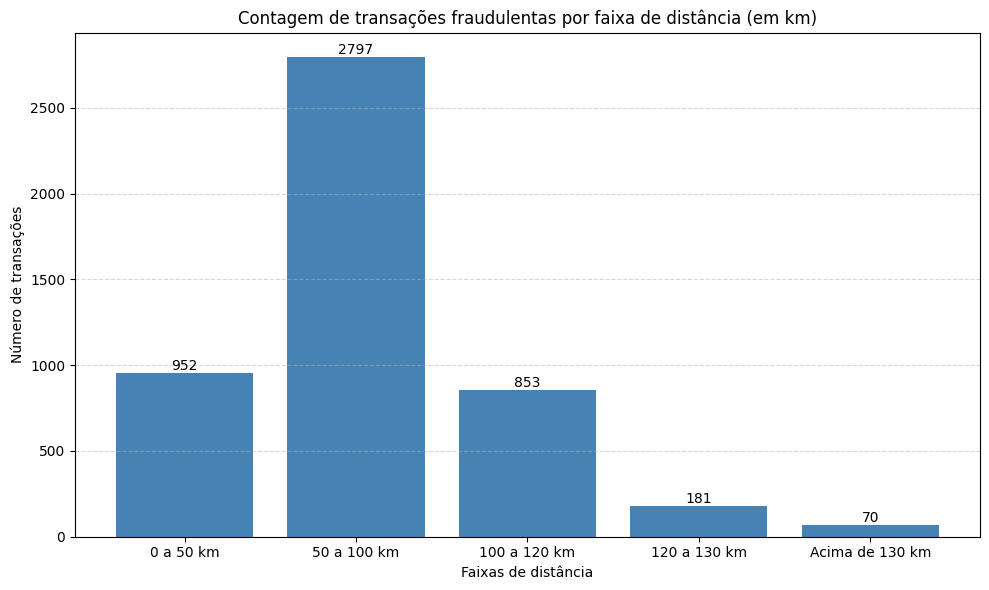

trans_date_trans_time            cc_num                            merchant       category    amt      first     last gender                        street            city state    zip   lat    long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018      36.01      -82.05         0          0.00   Sem dist√¢ncia
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos 107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044      49.16     -118.19         0         30.21       0 a 50 km
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment 220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051      43.15     -112.15         0          0.00   Sem dist√¢ncia
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport  45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076      47.03     -112.56         0         95.67     50 a 100 km
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos  41.96      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186      38.67      -78.63         0         77.56     50 a 100 km

In [19]:
# Cria√ß√£o da vari√°vel categ√≥rica com base nas faixas de dist√¢ncia
bins = [0, 50, 100, 120, 130, float('inf')]
labels = ['0 a 50 km', '50 a 100 km', '100 a 120 km', '120 a 130 km', 'Acima de 130 km']

df_total['faixa_distancia'] = pd.cut(df_total['distancia_km'], bins=bins, labels=labels, right=True)

# Agora podemos fazer o agrupamento diretamente com essa nova vari√°vel
contagens = df_total[df_total['is_fraud'] == 1]['faixa_distancia'].value_counts().reindex(labels)

# Gr√°fico
plt.figure(figsize=(10, 6))
bars = plt.bar(contagens.index, contagens.values, color='steelblue')

# Adicionando r√≥tulos
for bar, count in zip(bars, contagens.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10)

plt.title('Contagem de transa√ß√µes fraudulentas por faixa de dist√¢ncia (em km)')
plt.ylabel('N√∫mero de transa√ß√µes')
plt.xlabel('Faixas de dist√¢ncia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Preencher NaN com categoria expl√≠cita, sao os valores cuja regra nao se aplicou, pois nao tem distancia a ser calculada, pois sao compras nao presenciais 
df_total['faixa_distancia'] = df_total['faixa_distancia'].cat.add_categories('Sem dist√¢ncia')
df_total['faixa_distancia'].fillna('Sem dist√¢ncia', inplace=True)

df_total.head(5)


In [20]:
# Copia a coluna de trans_num para preserva-la comom coluna de dados no df 
df_total["trans_num_copy"] = df_total["trans_num"]

# Define o √≠ndice como trans_num 
df_total.set_index("trans_num_copy", inplace=True)


In [21]:
df_total.index.name = None #tira o cabecalho da variavel trans_num da primeira linha do df

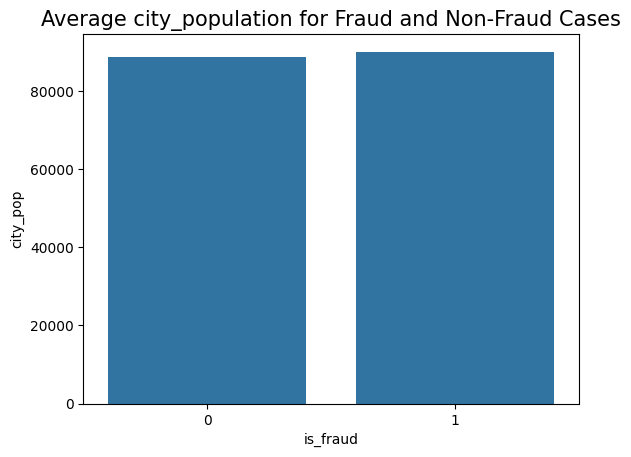

T-test: t-statistic = 0.443, p-value = 0.658, p-value<0.05? False


In [22]:
sns.barplot(data=df_total,x='is_fraud', y='city_pop', ci=None)
plt.title('Average city_population for Fraud and Non-Fraud Cases',fontsize=15)
plt.show()

fraud_population = df_total[df_total['is_fraud'] == 1]['city_pop']
non_fraud_population = df_total[df_total['is_fraud'] == 0]['city_pop']
t_stat, p_value = ttest_ind(fraud_population, non_fraud_population)
print(f'T-test: t-statistic = {round(t_stat,3)}, p-value = {round(p_value,3)}, p-value<0.05? {p_value<0.05}')



In [23]:
#Como aceitamos a hip√≥tese nula(p-val > 0.05), conclu√≠mos que n√£o h√° diferen√ßa significativa entre as m√©dias.
#Conclu√≠mos tamb√©m que city_population n√£o nos ajuda no alvo (is_fraud), ent√£o o descartaremos.

In [24]:
# Dropando colunas desnecessarias
colunas_excluir = ['unix_time','city_pop','first','last']
df_total = Limpa_df(df_total, colunas_excluir)

#colunas_excluir = ['unix_time', 'zip', 'state', 'city', 'street', 'gender', 'last', 'first','job','merchant']

df_total.head(5)

trans_date_trans_time            cc_num                            merchant       category    amt gender                        street            city state    zip   lat    long                                job         dob                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9      36.01      -82.05         0          0.00   Sem dist√¢ncia
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99      49.16     -118.19         0         30.21       0 a 50 km
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95      43.15     -112.15         0          0.00   Sem dist√¢ncia
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81      47.03     -112.56         0         95.67     50 a 100 km
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46      38.67      -78.63         0         77.56     50 a 100 km

In [25]:
#clean merchant column
df_total['merchant'] = df_total['merchant'].apply(lambda x : x.replace('fraud_',''))
df_total.head(5)

trans_date_trans_time            cc_num                      merchant       category    amt gender                        street            city state    zip   lat    long                                job         dob                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095          Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9      36.01      -82.05         0          0.00   Sem dist√¢ncia
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322     Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99      49.16     -118.19         0         30.21       0 a 50 km
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661                Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95      43.15     -112.15         0          0.00   Sem dist√¢ncia
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240  Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81      47.03     -112.56         0         95.67     50 a 100 km
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984                 Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46      38.67      -78.63         0         77.56     50 a 100 km

* A vari√°vel horas_entre_transacoes representa o intervalo de tempo, em horas, entre transa√ß√µes consecutivas de um mesmo cart√£o de cr√©dito. Ela foi criada para analisar o comportamento temporal das transa√ß√µes, para identificar padr√µes que possam indicar transa√ß√µes fraudulentas. 


* O teste t indica uma diferen√ßa estatisticamente significativa entre o tempo m√©dio entre transa√ß√µes de clientes fraudulentos e n√£o fraudulentos. Com um valor T de 27.27 e um p-valor de 0.00, as transa√ß√µes fraudulentas parecem ter um padr√£o distinto de tempo em compara√ß√£o com as n√£o fraudulentas, o que sugere que o tempo entre transa√ß√µes pode ser um fator importante na identifica√ß√£o de comportamentos suspeitos.

* A diferen√ßa de m√©dia observada sugere que as transa√ß√µes fraudulentas podem ocorrer em intervalos de tempo consideravelmente diferentes ‚Äî mais curtos, neste caso ‚Äî em rela√ß√£o √†s transa√ß√µes n√£o fraudulentas.

* Como o p-valor √© menor que 0,05, rejeitamos a hip√≥tese nula. Isso confirma que a m√©dia do intervalo em horas entre transa√ß√µes √© significativamente diferente entre transa√ß√µes fraudulentas e n√£o fraudulentas.

           T  p-val
T-test 27.27   0.00


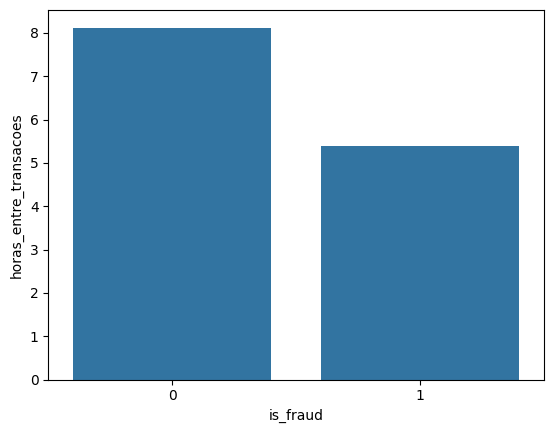

In [26]:
import pingouin

# Converter 'dob' e 'trans_date...' para datetime
df_total["dob"] = pd.to_datetime(df_total["dob"])
df_total["trans_date_trans_time"] = pd.to_datetime(df_total["trans_date_trans_time"])

#We will get the time between transactions for each card
#Time=0 for every first transaction and time will be represented in hours.
df_total.sort_values(['cc_num', 'trans_date_trans_time'],inplace=True)
df_total['horas_entre_transacoes']=((df_total.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h'))


df_total.loc[df_total['horas_entre_transacoes'].isna(),'horas_entre_transacoes'] = 0
df_total['horas_entre_transacoes'] = df_total['horas_entre_transacoes'].astype(int)


# x_0=df.groupby('is_fraud')['horas_entre_transacoes'].mean().values[0]
# x_1=df.groupby('is_fraud')['horas_entre_transacoes'].mean().values[1]
# std_0=df.groupby('is_fraud')['horas_entre_transacoes'].std().values[0]
# std_1=df.groupby('is_fraud')['horas_entre_transacoes'].std().values[1]
# n_0=df.groupby('is_fraud')['horas_entre_transacoes'].count().values[0]
# n_1=df.groupby('is_fraud')['horas_entre_transacoes'].count().values[1]
# numerator = x_0 - x_1
# domin = np.sqrt(std_0**2/n_0 + std_1**2/n_1)
# t_stat=numerator/domin
# p_val = 2*(1-t.cdf(abs(t_stat),df=n_0+n_1-2))
# print(t_stat,p_val)
#----------------------
#The power of pingouin library!
print(pingouin.ttest(df_total[df_total['is_fraud'] == 0]['horas_entre_transacoes'],
              df_total[df_total['is_fraud'] == 1]['horas_entre_transacoes'],
              alternative='two-sided')[['T','p-val']])
sns.barplot(data=df_total,x='is_fraud',y='horas_entre_transacoes',ci=None)
plt.show()

In [27]:

df_total.head(5)

trans_date_trans_time       cc_num                     merchant       category   amt gender            street           city state    zip   lat    long                          job        dob                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes
98e3dcf98101146a577f85a34e58feec   2019-01-01 12:47:15  60416207185  Jones, Sawayn and Romaguera       misc_net  7.27      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  98e3dcf98101146a577f85a34e58feec      43.97     -109.74         0          0.00   Sem dist√¢ncia                       0
498120fc45d277f7c88e3dba79c33865   2019-01-02 08:44:57  60416207185                    Berge LLC  gas_transport 52.94      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  498120fc45d277f7c88e3dba79c33865      42.02     -109.04         0        110.31    100 a 120 km                      19
95f514bb993151347c7acdf8505c3d62   2019-01-02 08:47:36  60416207185                 Luettgen PLC  gas_transport 82.08      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  95f514bb993151347c7acdf8505c3d62      42.96     -109.16         0         21.79       0 a 50 km                       0
4f0c1a14e0aa7eb56a490780ef9268c5   2019-01-02 12:38:14  60416207185                Daugherty LLC      kids_pets 34.79      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  4f0c1a14e0aa7eb56a490780ef9268c5      42.23     -108.75         0          0.00   Sem dist√¢ncia                       3
3b2ebd3af508afba959640893e1e82bc   2019-01-02 13:10:46  60416207185               Beier and Sons           home 27.18      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  3b2ebd3af508afba959640893e1e82bc      43.32     -108.09         0          0.00   Sem dist√¢ncia                       0

* A vari√°vel age foi criada para representar a idade do titular do cart√£o no momento de cada transa√ß√£o. Ela √© calculada a partir da diferen√ßa entre o ano da transa√ß√£o e o ano de nascimento, evitando distor√ß√µes que poderiam ocorrer ao usar a data atual. Ap√≥s a cria√ß√£o da vari√°vel age, a coluna de data de nascimento (dob) foi removida, pois j√° n√£o era mais necess√°ria para a an√°lise.

In [28]:
#transformar variaveis com transformacao relevante (inicialmente) no dicionario de dados CONTINUAR

#calculando a idade
#usando a diferenca entre o nascimento e o momento da transacao para evitar distorcoes (usar a data atual criaria uma idade flutuante ao longo do tempo)
df_total["age"] = df_total.apply(lambda linha: linha["trans_date_trans_time"].year - linha["dob"].year, axis=1) #funcao lambda "linha" que aplica a subtracao de datas linha a linha no df_total atraves do apply()

#remove data de nascimento, nao e mais util
df_total.drop(columns=["dob"], inplace=True)

df_total.head(5)

trans_date_trans_time       cc_num                     merchant       category   amt gender            street           city state    zip   lat    long                          job                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes  age
98e3dcf98101146a577f85a34e58feec   2019-01-01 12:47:15  60416207185  Jones, Sawayn and Romaguera       misc_net  7.27      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  98e3dcf98101146a577f85a34e58feec      43.97     -109.74         0          0.00   Sem dist√¢ncia                       0   33
498120fc45d277f7c88e3dba79c33865   2019-01-02 08:44:57  60416207185                    Berge LLC  gas_transport 52.94      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  498120fc45d277f7c88e3dba79c33865      42.02     -109.04         0        110.31    100 a 120 km                      19   33
95f514bb993151347c7acdf8505c3d62   2019-01-02 08:47:36  60416207185                 Luettgen PLC  gas_transport 82.08      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  95f514bb993151347c7acdf8505c3d62      42.96     -109.16         0         21.79       0 a 50 km                       0   33
4f0c1a14e0aa7eb56a490780ef9268c5   2019-01-02 12:38:14  60416207185                Daugherty LLC      kids_pets 34.79      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  4f0c1a14e0aa7eb56a490780ef9268c5      42.23     -108.75         0          0.00   Sem dist√¢ncia                       3   33
3b2ebd3af508afba959640893e1e82bc   2019-01-02 13:10:46  60416207185               Beier and Sons           home 27.18      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  3b2ebd3af508afba959640893e1e82bc      43.32     -108.09         0          0.00   Sem dist√¢ncia                       0   33

* A vari√°vel bin foi criada para representar o c√≥digo do banco da transa√ß√£o, extra√≠do dos primeiros 6 d√≠gitos do n√∫mero do cart√£o (cc_num). Essa informa√ß√£o √© importante para identificar a institui√ß√£o financeira associada √† transa√ß√£o.

In [29]:
df_total["bin"] = df_total["cc_num"].astype(str).str[:6]
df_total.head(5)

trans_date_trans_time       cc_num                     merchant       category   amt gender            street           city state    zip   lat    long                          job                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes  age     bin
98e3dcf98101146a577f85a34e58feec   2019-01-01 12:47:15  60416207185  Jones, Sawayn and Romaguera       misc_net  7.27      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  98e3dcf98101146a577f85a34e58feec      43.97     -109.74         0          0.00   Sem dist√¢ncia                       0   33  604162
498120fc45d277f7c88e3dba79c33865   2019-01-02 08:44:57  60416207185                    Berge LLC  gas_transport 52.94      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  498120fc45d277f7c88e3dba79c33865      42.02     -109.04         0        110.31    100 a 120 km                      19   33  604162
95f514bb993151347c7acdf8505c3d62   2019-01-02 08:47:36  60416207185                 Luettgen PLC  gas_transport 82.08      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  95f514bb993151347c7acdf8505c3d62      42.96     -109.16         0         21.79       0 a 50 km                       0   33  604162
4f0c1a14e0aa7eb56a490780ef9268c5   2019-01-02 12:38:14  60416207185                Daugherty LLC      kids_pets 34.79      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  4f0c1a14e0aa7eb56a490780ef9268c5      42.23     -108.75         0          0.00   Sem dist√¢ncia                       3   33  604162
3b2ebd3af508afba959640893e1e82bc   2019-01-02 13:10:46  60416207185               Beier and Sons           home 27.18      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  3b2ebd3af508afba959640893e1e82bc      43.32     -108.09         0          0.00   Sem dist√¢ncia                       0   33  604162

* As vari√°veis relacionadas ao hor√°rio da transa√ß√£o foram extra√≠das para fornecer uma an√°lise mais detalhada do momento da transa√ß√£o. A coluna day_of_week indica o dia da semana em que a transa√ß√£o ocorreu (0 para segunda-feira, 6 para domingo), e a coluna month representa o m√™s da transa√ß√£o. A coluna time cont√©m o hor√°rio completo (hora:minuto:segundo) da transa√ß√£o.

* Al√©m disso, a vari√°vel period classifica o hor√°rio da transa√ß√£o em per√≠odos do dia, como "Madrugada In√≠cio", "Manh√£ Final", "Tarde In√≠cio", entre outros, com base na hora extra√≠da da transa√ß√£o. Essas informa√ß√µes podem ser √∫teis para analisar padr√µes de comportamento de transa√ß√µes ao longo do tempo.

In [30]:
# extraindo variaveis do horario da transacao

# Certificando que a coluna 'trans_date_trans_time' est√° no formato datetime
df_total['trans_date_trans_time'] = pd.to_datetime(df_total['trans_date_trans_time'])

# Extraindo o dia da semana (0=segunda, 1=ter√ßa, ..., 6=domingo)
df_total['day_of_week'] = df_total['trans_date_trans_time'].dt.dayofweek

# Extraindo o m√™s
df_total['month'] = df_total['trans_date_trans_time'].dt.month

# Extraindo o hor√°rio completo (hora:minuto:segundo)
df_total['time'] = df_total['trans_date_trans_time'].dt.strftime('%H:%M:%S')


def classify_period(hour):
    if 0 <= hour < 3:
        return 'Madrugada In√≠cio'
    elif 3 <= hour < 6:
        return 'Madrugada Final'
    elif 6 <= hour < 9:
        return 'Manh√£ In√≠cio'
    elif 9 <= hour < 12:
        return 'Manh√£ Final'
    elif 12 <= hour < 15:
        return 'Tarde In√≠cio'
    elif 15 <= hour < 18:
        return 'Tarde Final'
    elif 18 <= hour < 21:
        return 'Noite In√≠cio'
    elif 21 <= hour < 24:
        return 'Noite Final'


# Extraindo a hora da transa√ß√£o
df_total['hour'] = df_total['trans_date_trans_time'].dt.hour

# Aplicando a fun√ß√£o para classificar o per√≠odo
df_total['period'] = df_total['hour'].apply(classify_period)

df_total.head(5)


trans_date_trans_time       cc_num                     merchant       category   amt gender            street           city state    zip   lat    long                          job                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month      time  hour        period
98e3dcf98101146a577f85a34e58feec   2019-01-01 12:47:15  60416207185  Jones, Sawayn and Romaguera       misc_net  7.27      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  98e3dcf98101146a577f85a34e58feec      43.97     -109.74         0          0.00   Sem dist√¢ncia                       0   33  604162            1      1  12:47:15    12  Tarde In√≠cio
498120fc45d277f7c88e3dba79c33865   2019-01-02 08:44:57  60416207185                    Berge LLC  gas_transport 52.94      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  498120fc45d277f7c88e3dba79c33865      42.02     -109.04         0        110.31    100 a 120 km                      19   33  604162            2      1  08:44:57     8  Manh√£ In√≠cio
95f514bb993151347c7acdf8505c3d62   2019-01-02 08:47:36  60416207185                 Luettgen PLC  gas_transport 82.08      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  95f514bb993151347c7acdf8505c3d62      42.96     -109.16         0         21.79       0 a 50 km                       0   33  604162            2      1  08:47:36     8  Manh√£ In√≠cio
4f0c1a14e0aa7eb56a490780ef9268c5   2019-01-02 12:38:14  60416207185                Daugherty LLC      kids_pets 34.79      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  4f0c1a14e0aa7eb56a490780ef9268c5      42.23     -108.75         0          0.00   Sem dist√¢ncia                       3   33  604162            2      1  12:38:14    12  Tarde In√≠cio
3b2ebd3af508afba959640893e1e82bc   2019-01-02 13:10:46  60416207185               Beier and Sons           home 27.18      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  3b2ebd3af508afba959640893e1e82bc      43.32     -108.09         0          0.00   Sem dist√¢ncia                       0   33  604162            2      1  13:10:46    13  Tarde In√≠cio

A vari√°vel "count_tran_ult_jan_temp" foi criada para contar o n√∫mero de transa√ß√µes realizadas nos √∫ltimos 15 segundos antes de cada transa√ß√£o, com o objetivo de identificar comportamentos suspeitos e padr√µes de fraudes, como transa√ß√µes seguidas rapidamente. O c√°lculo considera cada transa√ß√£o e verifica o n√∫mero de transa√ß√µes anteriores realizadas, para cada cartao, dentro desse intervalo de 15 segundos. Isso pode ajudar a detectar transa√ß√µes fraudulentas que ocorrem em um curto per√≠odo de tempo.

Os testes indicam uma diferen√ßa estat√≠stica significativa no n√∫mero de transa√ß√µes realizadas nos √∫ltimos 15 segundos entre transa√ß√µes fraudulentas e n√£o fraudulentas. Com um valor T de -5.55 e um p-valor de 0.00, observamos que as transa√ß√µes fraudulentas tendem a ocorrer com um n√∫mero menor de transa√ß√µes consecutivas dentro desse intervalo curto, em compara√ß√£o com as transa√ß√µes n√£o fraudulentas. Isso sugere que o comportamento de transa√ß√µes em intervalos breves pode ser um indicativo de fraude, sendo uma caracter√≠stica distintiva entre os dois grupos.

Como o p-valor √© menor que 0,05, rejeitamos a hip√≥tese nula. Isso confirma que a contagem de transa√ß√µes nos √∫ltimos 15 segundos √© significativamente diferente entre transa√ß√µes fraudulentas e n√£o fraudulentas.

           T  p-val
T-test -5.55   0.00


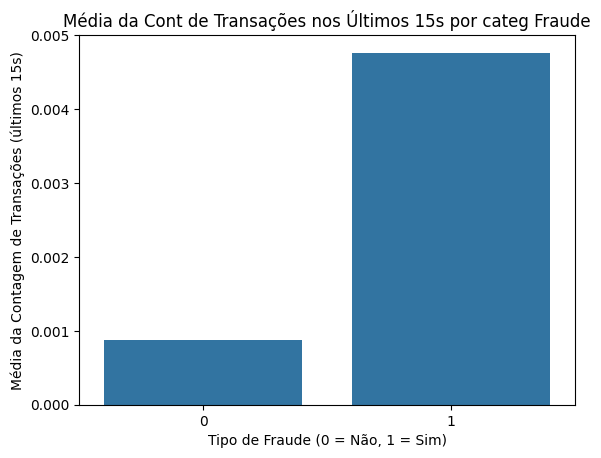

index trans_date_trans_time            cc_num                      merchant       category    amt gender                        street            city state    zip   lat    long                                job  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month      time  hour            period  count_tran_ult_jan_temp
trans_num                                                                                                                                                                                                                                                                                                                                                                                                                                                           
0b242abb623afc578575680df30655b9  0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095          Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18          Psychologist, counselling      36.01      -82.05         0          0.00   Sem dist√¢ncia                       0   31  270318            1      1  00:00:18     0  Madrugada In√≠cio                        0
1f76529f8574734946361c461b024d99  1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322     Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21  Special educational needs teacher      49.16     -118.19         0         30.21       0 a 50 km                       0   41  630423            1      1  00:00:44     0  Madrugada In√≠cio                        0
a1a22d70485983eac12b5b88dad1cf95  a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661                Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26        Nature conservation officer      43.15     -112.15         0          0.00   Sem dist√¢ncia                       0   57  388594            1      1  00:00:51     0  Madrugada In√≠cio                        0
6b849c168bdad6f867558c3793159a81  6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240  Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11                    Patent attorney      47.03     -112.56         0         95.67     50 a 100 km                       0   52  353409            1      1  00:01:16     0  Madrugada In√≠cio                        0
a41d7549acf90789359a9aa5346dcb46  a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984                 Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46     Dance movement psychotherapist      38.67      -78.63         0         77.56     50 a 100 km                       0   33  375534            1      1  00:03:06     0  Madrugada In√≠cio                        0

In [31]:
# Converter para datetime e ordenar
df_total['trans_date_trans_time'] = pd.to_datetime(df_total['trans_date_trans_time'])
df_total = df_total.sort_values(by=['trans_date_trans_time', 'cc_num'])

# Resetar o √≠ndice temporariamente para permitir o uso com numpy (evita erro com string como √≠ndice)
df_total_reset = df_total.reset_index()  # trans_num vira coluna

# Criar array para armazenar a contagem
trans_count_list = np.zeros(len(df_total_reset), dtype=int)

# Aplicar a contagem eficiente usando searchsorted()
for card, group in df_total_reset.groupby('cc_num'):
    timestamps = group['trans_date_trans_time'].values
    idx = np.searchsorted(timestamps, timestamps - np.timedelta64(15, 's'), side='left')
    trans_count_list[group.index] = np.arange(len(group)) - idx

# Atribuir os valores ao DataFrame
df_total_reset['count_tran_ult_jan_temp'] = trans_count_list

# Restaurar o √≠ndice original 'trans_num'
df_total = df_total_reset.set_index('trans_num')



#validando logica (comparar as horas entre as transacoes e se a quantidade bate)
#df_filtro = df_total[df_total['cc_num'] == 	4613314721966]
#df_filtro = df_filtro[df_filtro['is_fraud'] == 1	]

#df_filtro = df_filtro.sort_values(by='trans_date_trans_time', ascending=False)  # Ordenar do maior para o menor

#df_filtro.head(1000)



import pingouin
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
'''
# Considerando que a vari√°vel 'count_tran_ult_jan_temp' foi criada para contar as transa√ß√µes nos √∫ltimos 15 segundos
# Usando o c√≥digo estat√≠stico para comparar as m√©dias entre as categorias de is_fraud (0 = N√£o, 1 = Sim)

# Calculando as m√©dias e desvio padr√£o para as duas categorias de is_fraud
x_0 = df_total[df_total['is_fraud'] == 0]['count_tran_ult_jan_temp'].mean()  # M√©dia para 'N√£o Fraude'
x_1 = df_total[df_total['is_fraud'] == 1]['count_tran_ult_jan_temp'].mean()  # M√©dia para 'Fraude'

std_0 = df_total[df_total['is_fraud'] == 0]['count_tran_ult_jan_temp'].std()  # Desvio padr√£o para 'N√£o Fraude'
std_1 = df_total[df_total['is_fraud'] == 1]['count_tran_ult_jan_temp'].std()  # Desvio padr√£o para 'Fraude'

n_0 = df_total[df_total['is_fraud'] == 0]['count_tran_ult_jan_temp'].count()  # Contagem para 'N√£o Fraude'
n_1 = df_total[df_total['is_fraud'] == 1]['count_tran_ult_jan_temp'].count()  # Contagem para 'Fraude'

# C√°lculo do valor t e p-valor
numerator = x_0 - x_1
denominator = np.sqrt(std_0**2 / n_0 + std_1**2 / n_1)
t_stat = numerator / denominator

# Graus de liberdade
df = n_0 + n_1 - 2
p_val = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Exibindo t_stat e p_val
print(f"t-statistic: {t_stat}, p-value: {p_val}")

'''

#-----------------------------
# Usando a biblioteca Pingouin para realizar o teste t
ttest_result = pingouin.ttest(
    df_total[df_total['is_fraud'] == 0]['count_tran_ult_jan_temp'],
    df_total[df_total['is_fraud'] == 1]['count_tran_ult_jan_temp'],
    alternative='two-sided'
)

# Exibindo resultado do teste
print(ttest_result[['T', 'p-val']])

# Gr√°fico de barras para visualizar a contagem de transa√ß√µes por tipo de fraude
sns.barplot(data=df_total, x='is_fraud', y='count_tran_ult_jan_temp', ci=None)
plt.title('M√©dia da Cont de Transa√ß√µes nos √öltimos 15s por categ Fraude')
plt.xlabel('Tipo de Fraude (0 = N√£o, 1 = Sim)')
plt.ylabel('M√©dia da Contagem de Transa√ß√µes (√∫ltimos 15s)')
plt.show()

df_total.head(5)





* Vari√°vel de Frequ√™ncia de Uso do Cart√£o foi criada com base na quantidade de vezes que cada cart√£o foi utilizado ao longo de todo o per√≠odo da amostra. O objetivo dessa vari√°vel √© medir a frequ√™ncia de uso do cart√£o e verificar se cart√µes com menor frequ√™ncia de uso (como cart√µes novos ou pouco utilizados) est√£o mais associados a transa√ß√µes fraudulentas.

* A an√°lise mostra que as fraudes ocorrem com maior frequ√™ncia em cart√µes com baixo n√∫mero de utiliza√ß√µes, indicando um padr√£o mais comum em cart√µes novos ou pouco usados. J√° as transa√ß√µes genu√≠nas apresentam uma distribui√ß√£o mais pr√≥xima da normalidade em rela√ß√£o √† frequ√™ncia de uso dos cart√µes.

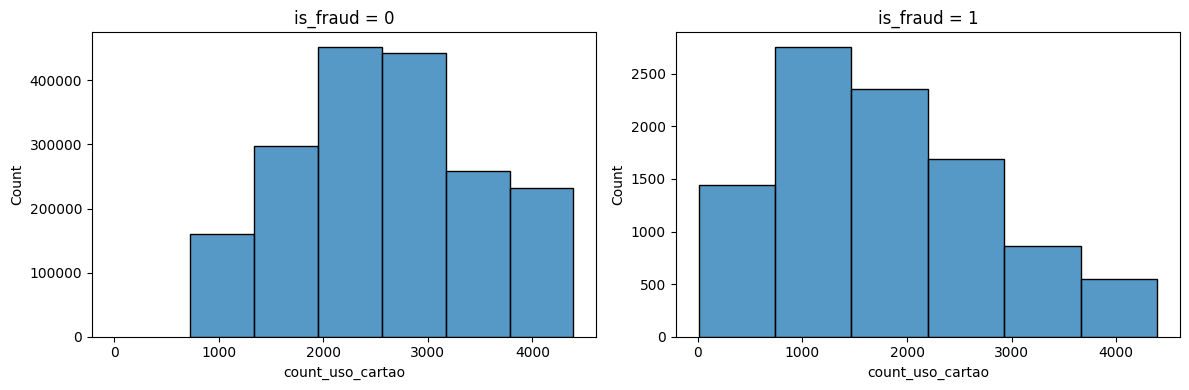

Categorias √∫nicas: [4 6 1 2 3 5]


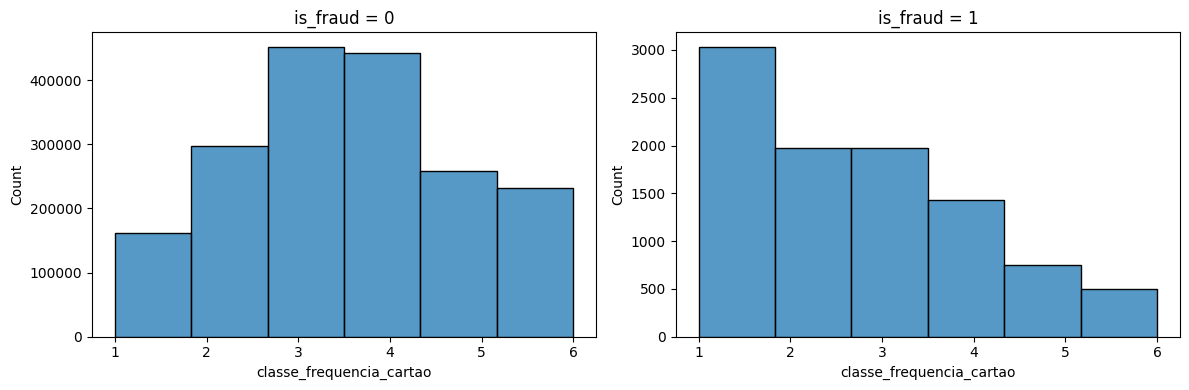

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Fun√ß√£o para exibir histogramas lado a lado
def hist_show(col):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
    for i in [0, 1]:
        sns.histplot(df_total[df_total["is_fraud"] == i][col], bins=6, ax=axs[i])
        axs[i].set_title(f'is_fraud = {i}')
    plt.tight_layout()
    plt.show()

# 2. Contar quantas vezes cada cart√£o aparece na base
df_qtd_uso_cartoes = df_total.groupby('cc_num').size().reset_index(name='count_uso_cartao')

# 3. Juntar essa informa√ß√£o de volta ao DataFrame original
df_total = df_total.merge(df_qtd_uso_cartoes, on='cc_num', how='left')

# 4. Mostrar histograma da contagem original
hist_show('count_uso_cartao')

# 5. Fun√ß√£o para classificar o uso do cart√£o em faixas
def class_det(x):
    for idx, val in enumerate(range(800, 5000, 800)):
        if x < val:
            return idx + 1
    return len(range(800, 5000, 800)) + 1  # Classe extra se acima de 5000

# 6. Criar vari√°vel categ√≥rica
df_total['classe_frequencia_cartao'] = df_total['count_uso_cartao'].apply(class_det)

# 7. Verificar as classes √∫nicas
print("Categorias √∫nicas:", df_total['classe_frequencia_cartao'].unique())

# 8. Exibir histograma da vari√°vel categorizada
hist_show('classe_frequencia_cartao')



# Define o √≠ndice novamente (foi desconfigurado nos processos anteriores)
df_total.set_index("index", inplace=True)

df_total.index.name = None #tira o cabecalho da variavel da primeira linha do df


#Aplica def de reorganizar colunas 
df_total = mover_target_para_final(df_total, 'is_fraud')

# Transforma√ß√£o de Hor√°rio em Vari√°veis C√≠clicas (Seno e Cosseno)

A vari√°vel time, que representa o hor√°rio da transa√ß√£o, possui natureza c√≠clica, ou seja, ap√≥s 23:59 o ciclo recome√ßa em 00:00. Modelos de Machine Learning n√£o entendem esse padr√£o circular por padr√£o, e tratam 23h e 0h como distantes, quando na verdade s√£o muito pr√≥ximas.

Para capturar essa ciclicidade corretamente, transformamos a hora em duas novas vari√°veis usando fun√ß√µes trigonom√©tricas:

time_sin = sin(2œÄ * hora / 24)

time_cos = cos(2œÄ * hora / 24)

Essas vari√°veis projetam o hor√°rio em um c√≠rculo unit√°rio, permitindo que o modelo entenda a transi√ß√£o natural entre hor√°rios e aprenda padr√µes temporais com mais precis√£o.

Essa t√©cnica √© especialmente √∫til em modelos lineares, onde rela√ß√µes c√≠clicas n√£o s√£o captadas automaticamente.

In [33]:

# Converter a coluna 'time' de string para datetime.time
df_total['time'] = pd.to_datetime(df_total['time'], format='%H:%M:%S').dt.time

# Extrair a hora, minuto e segundo como n√∫mero decimal de hora
df_total['hora_decimal'] = df_total['time'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

# Codifica√ß√£o c√≠clica: seno e cosseno da hora do dia
df_total['time_sin'] = np.sin(2 * np.pi * df_total['hora_decimal'] / 24)
df_total['time_cos'] = np.cos(2 * np.pi * df_total['hora_decimal'] / 24)



#dropando variavel 'time' apos transformaca, caso ela seja necessaia para calcular o tempo entre trnasacoes (se essa variavel for viabilizada, esta em analise se faz sentido) 
#basta comentar essa parte do codigo que ela se mantem 

# Dropando colunas desnecessarias
colunas_excluir = ['time']
df_total = Limpa_df(df_total, colunas_excluir)


#visualizando nova feature
pd.set_option('display.max_rows', None)
df_total.head(10)

trans_date_trans_time            cc_num                      merchant       category    amt gender                          street            city state    zip   lat    long                                job  merch_lat  merch_long  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month  hour            period  count_tran_ult_jan_temp  count_uso_cartao  classe_frequencia_cartao  is_fraud  hora_decimal  time_sin  time_cos
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095          Rippin, Kub and Mann       misc_net   4.97      F                  561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18          Psychologist, counselling      36.01      -82.05          0.00   Sem dist√¢ncia                       0   31  270318            1      1     0  Madrugada In√≠cio                        0              2927                         4         0          0.01      0.00      1.00
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322     Heller, Gutmann and Zieme    grocery_pos 107.23      F    43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21  Special educational needs teacher      49.16     -118.19         30.21       0 a 50 km                       0   41  630423            1      1     0  Madrugada In√≠cio                        0              4362                         6         0          0.01      0.00      1.00
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661                Lind-Buckridge  entertainment 220.11      M        594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26        Nature conservation officer      43.15     -112.15          0.00   Sem dist√¢ncia                       0   57  388594            1      1     0  Madrugada In√≠cio                        0               735                         1         0          0.01      0.00      1.00
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240  Kutch, Hermiston and Farrell  gas_transport  45.00      M     9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11                    Patent attorney      47.03     -112.56         95.67     50 a 100 km                       0   52  353409            1      1     0  Madrugada In√≠cio                        0               743                         1         0          0.02      0.01      1.00
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984                 Keeling-Crist       misc_pos  41.96      M                408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46     Dance movement psychotherapist      38.67      -78.63         77.56     50 a 100 km                       0   33  375534            1      1     0  Madrugada In√≠cio                        0              2922                         4         0          0.05      0.01      1.00
189a841a0a8ba03058526bcfe566aab5   2019-01-01 00:04:08  4767265376804500    Stroman, Hudson and Erdman  gas_transport  94.63      F               4655 David Island          Dublin    PA  18917 40.38  -75.20                  Transport planner      40.65      -76.15         85.92     50 a 100 km                       0   58  476726            1      1     0  Madrugada In√≠cio                        0               736                         1         0          0.07      0.02      1.00
83ec1cc84142af6e2acf10c44949e720   2019-01-01 00:04:42    30074693890476               Rowe-Vandervort    grocery_net  44.54      F     889 Sarah Station Suite 624         Holcomb    KS  67851 37.99 -100.99                    Arboriculturist      37.16     -100.15          0.00   Sem dist√¢ncia                       0   26  300746            1      1     0  Madrugada In√≠cio                        0              2933                         4         0          0.08      0.02      1.00
6d294ed2cc447d2c71c7171a3d54967c   2019-01-01 00:05:08  6011360759745864                Corwin-Collins  gas_tra

* verificando os tipos das variaveis e a contagem de categorias das categoricas 
    * das 3 categoricas e possivel notar que a vartaivel bin que corresponde ao codigo do suposto banco de cada transacao, tem muitas categorias (muitos bancos) isso torna inviavel one hot encoder
    * Entao na celula seguinte, foi verificado dos bancos mais ofensores em percentual de fraudes por transacao, para encontrar algum padrao 
    * Dado isso, ser√° aplicada uma transforma√ß√£o de Target Encoding (neste caso, Mean Encoding), que substitui cada categoria de bin pela m√©dia do target (propor√ß√£o m√©dia de fraude) dentro daquela categoria. 
        * Para evitar overfitting e vazamento de dados, a codifica√ß√£o ser√° aplicada separadamente dentro de cada fold durante a valida√ß√£o cruzada e, posteriormente, no conjunto de teste de forma independente. 
        * Al√©m disso, ser√° utilizado o par√¢metro smoothing, que atua como uma forma de regulariza√ß√£o. O smoothing realiza um balanceamento entre a m√©dia do target por categoria e a m√©dia global do target, dando mais peso √† m√©dia global em categorias com poucas observa√ß√µes. Isso ajuda a suavizar os valores atribu√≠dos a categorias raras e reduz o risco de superestimar seu efeito, tornando o modelo mais robusto.

In [34]:

# VERIFICANDO OS TIPOS PARA POSSIVEL TRANSFORMACAO 
print(df_total.dtypes)

print('')
# Selecionar colunas do tipo object
object_cols = df_total.select_dtypes(include='object').columns

# Contar categorias √∫nicas em cada uma
for col in object_cols:
    print(f"{col}: {df_total[col].nunique()} categorias √∫nicas")



trans_date_trans_time       datetime64[ns]
cc_num                               int64
merchant                            object
category                            object
amt                                float64
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
job                                 object
merch_lat                          float64
merch_long                         float64
distancia_km                       float64
faixa_distancia                   category
horas_entre_transacoes               int64
age                                  int64
bin                                 object
day_of_week                          int32
month                                int32
hour                                 int32
period     

In [35]:
# Agrupamento por bin com os indicadores
resumo_bin = (
    df_total
    .groupby('bin')
    .agg(
        proporcao_fraude=('is_fraud', 'mean'),
        contagem_fraude=('is_fraud', 'sum'),
        total_transacoes=('is_fraud', 'count')
    )
    .reset_index()
    .sort_values(by='proporcao_fraude', ascending=False)
)

# Auemntar para uns 100 para ver a quebra dos bancos mais ofensores em percentual
resumo_bin.head(10) 


bin  proporcao_fraude  contagem_fraude  total_transacoes
27   180098              1.00               12                12
4    180020              1.00               12                12
26   180097              1.00                7                 7
7    180038              1.00               10                10
960  676179              1.00               11                11
259  352804              1.00               11                11
603  441767              1.00               11                11
299  354733              1.00               11                11
283  354041              1.00                8                 8
922  651777              1.00               11                11

In [36]:
# Dropando colunas desnecessarias
#hour sai porque ja foi criada variaveis ciclicas com  Sen e Cos 
colunas_excluir = ['lat', 'long', 'merch_lat', 'merch_long','cc_num','hour']
df_total = Limpa_df(df_total, colunas_excluir)
df_total.head()

trans_date_trans_time                      merchant       category    amt gender                        street            city state    zip                                job  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month            period  count_tran_ult_jan_temp  count_uso_cartao  classe_frequencia_cartao  is_fraud  hora_decimal  time_sin  time_cos
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18          Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654          Psychologist, counselling          0.00   Sem dist√¢ncia                       0   31  270318            1      1  Madrugada In√≠cio                        0              2927                         4         0          0.01      0.00      1.00
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44     Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160  Special educational needs teacher         30.21       0 a 50 km                       0   41  630423            1      1  Madrugada In√≠cio                        0              4362                         6         0          0.01      0.00      1.00
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51                Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252        Nature conservation officer          0.00   Sem dist√¢ncia                       0   57  388594            1      1  Madrugada In√≠cio                        0               735                         1         0          0.01      0.00      1.00
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632                    Patent attorney         95.67     50 a 100 km                       0   52  353409            1      1  Madrugada In√≠cio                        0               743                         1         0          0.02      0.01      1.00
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06                 Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433     Dance movement psychotherapist         77.56     50 a 100 km                       0   33  375534            1      1  Madrugada In√≠cio                        0              2922                         4         0          0.05      0.01      1.00

# Aplicar a selecao de fatures por importancia antes do modelo (CONTINUAR)

In [37]:
#################################################

# Modelagem (separar um pouco essa fase, aqui tem separacao de treino e teste, optuna, aplicao final... separa para nao ficar pesada a leitura e correcoes, tipo modularizar mesmo)

* estudar a criacao de uma variavel que identifica a distancia (se e anormal) entre duas transacoes, acho que usar o racional da variavel de contagem de vezes que o cartao foi usado na ultima hora (trans_count_last_hour) 
ex: uma transacao feita presencialemnte seguida de outra presencialmente em locais muito distantes em 1 hora (ou outro periodo se for o caso) podem indicar uma possivel fraude

* Dividindo em treino e teste 

In [38]:
#teste usando as posicoes originais dos dados de treino e teste (aqui e pra testar se ha vies de selecao nas bases originais, se o resultado for excelente entao sim teve)
# ====================
# 2. Split em treino e teste
# ====================


# Passo 1: Pegar os trans_num originais
trans_train_ids = df_orig_train['trans_num'].unique()
trans_test_ids = df_orig_test['trans_num'].unique()

# Passo 2: Separar X e y do df_total
X = df_total.drop('is_fraud', axis=1)
y = df_total['is_fraud']

# Passo 3: Usar o √≠ndice (que √© o trans_num em df_total) para separar
X_train = X.loc[X.index.isin(trans_train_ids)].copy()
X_test = X.loc[X.index.isin(trans_test_ids)].copy()

y_train = y.loc[y.index.isin(trans_train_ids)].copy()
y_test = y.loc[y.index.isin(trans_test_ids)].copy()

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Total shape:", X.shape, y.shape)

print("Checagem duplicidade entre conjuntos:", set(X_train.index) & set(X_test.index))  # Deve ser vazio


# Dropa as vari√°veis indesejadas em treino e teste
cols_to_drop = ['trans_date_trans_time', 'cc_num']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')
X  = X.drop(columns=cols_to_drop, errors='ignore')

# Junta X_train e y_train para uso no Optuna
df_train = X_train.copy()
df_train['is_fraud'] = y_train

target = 'is_fraud'



Train shape: (1296675, 24) (1296675,)
Test shape: (555719, 24) (555719,)
Total shape: (1852394, 24) (1852394,)
Checagem duplicidade entre conjuntos: set()


In [39]:
X_train.head()

merchant       category    amt gender                        street            city state    zip                                job  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month            period  count_tran_ult_jan_temp  count_uso_cartao  classe_frequencia_cartao  hora_decimal  time_sin  time_cos
0b242abb623afc578575680df30655b9          Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654          Psychologist, counselling          0.00   Sem dist√¢ncia                       0   31  270318            1      1  Madrugada In√≠cio                        0              2927                         4          0.01      0.00      1.00
1f76529f8574734946361c461b024d99     Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160  Special educational needs teacher         30.21       0 a 50 km                       0   41  630423            1      1  Madrugada In√≠cio                        0              4362                         6          0.01      0.00      1.00
a1a22d70485983eac12b5b88dad1cf95                Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252        Nature conservation officer          0.00   Sem dist√¢ncia                       0   57  388594            1      1  Madrugada In√≠cio                        0               735                         1          0.01      0.00      1.00
6b849c168bdad6f867558c3793159a81  Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632                    Patent attorney         95.67     50 a 100 km                       0   52  353409            1      1  Madrugada In√≠cio                        0               743                         1          0.02      0.01      1.00
a41d7549acf90789359a9aa5346dcb46                 Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433     Dance movement psychotherapist         77.56     50 a 100 km                       0   33  375534            1      1  Madrugada In√≠cio                        0              2922                         4          0.05      0.01      1.00

# ====================
# 2. Split em treino e teste
# ====================
X = df_total.drop('is_fraud', axis=1)
y = df_total['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Dropa as vari√°veis indesejadas em treino e teste
cols_to_drop = ['trans_date_trans_time', 'cc_num']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')
X  = X.drop(columns=cols_to_drop, errors='ignore')

# Junta X_train e y_train para uso no Optuna
df_train = X_train.copy()
df_train['is_fraud'] = y_train

target = 'is_fraud'


* Analisando correlacoes 
    * a funcao aqui aplica as mesmas transformacoes que sao aplicadas no treino e no teste, mas com uma funcao separada para deixar as usadas no modelo somente para o modelo 
    * e feita uam copia do df_treino para preservar o df_treino do modelo. 

* Definindo funcoes transformadoras nas variaveis que serao usadas para feature importance, analise de correlacoes e fornecidas finalmente para o modelo 

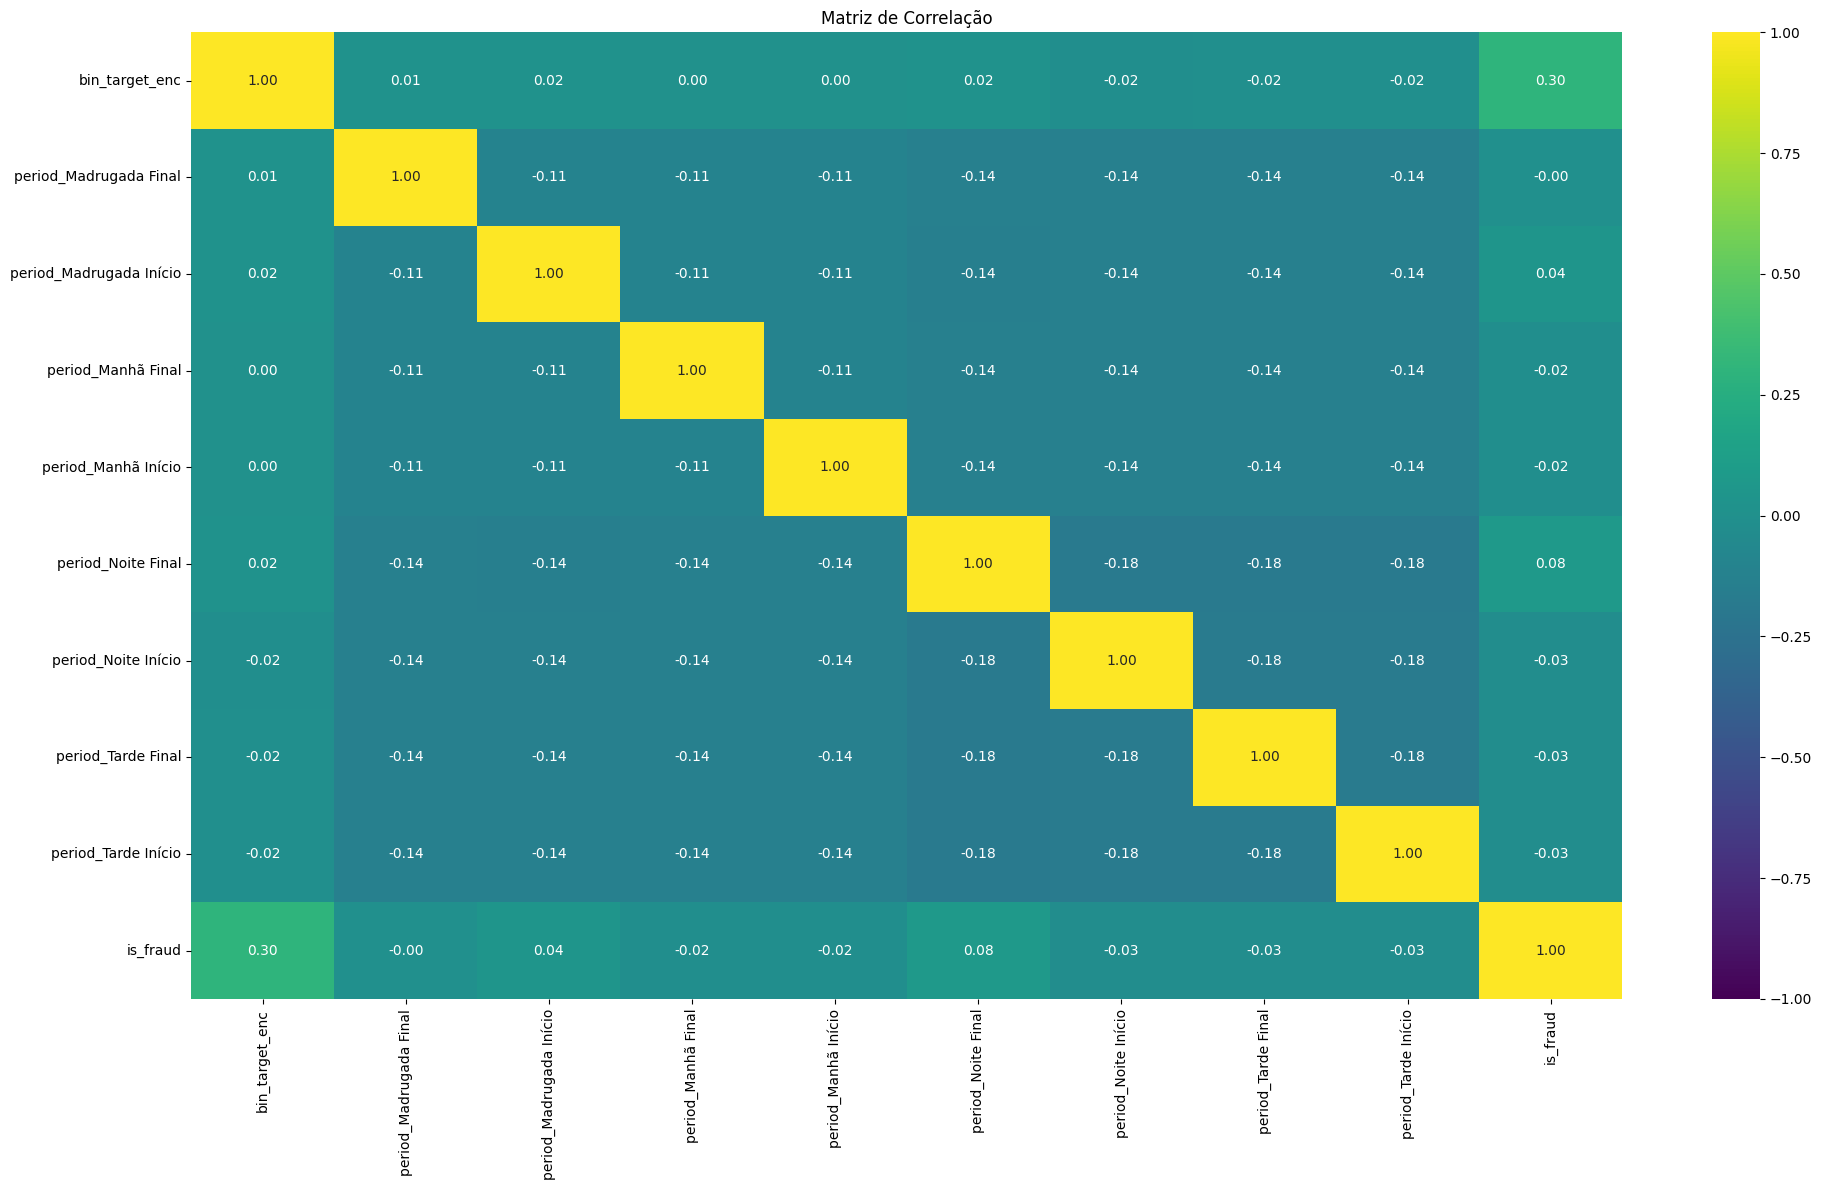

In [40]:
# ====================
#  1. funcoes transformadoras 
# ====================

# ====================
#  Target Encoding
# ====================
def apply_target_encoding(train, val_or_test, col, target, smoothing=15):
    global_mean = train[target].mean()
    stats = train.groupby(col)[target].agg(['mean', 'count'])
    smooth = (stats['mean'] * stats['count'] + global_mean * smoothing) / (stats['count'] + smoothing)
    encoded_col = val_or_test[col].map(smooth).fillna(global_mean)
    return encoded_col

# ====================
#  # One-Hot Encoding para colunas categ√≥ricas
# ====================

def fit_transform_ohe(train_df, val_df, col):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    train_encoded = ohe.fit_transform(train_df[[col]])
    val_encoded = ohe.transform(val_df[[col]])

    train_ohe = pd.DataFrame(train_encoded, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]], index=train_df.index)
    val_ohe = pd.DataFrame(val_encoded, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]], index=val_df.index)

    return train_ohe, val_ohe, ohe






def prepare_df_train_temp(df_train, target):
    # Cria uma c√≥pia para preservar o original
    df_train_temp = df_train.copy()

    # ====== Target Encoding ======
    df_train_temp['bin_target_enc'] = apply_target_encoding(df_train, df_train_temp, 'bin', target)

    # ====== OneHot Encoding ======
    #_, ohe_cat_df, ohe_cat = fit_transform_ohe(df_train, df_train_temp, 'category')
    _, ohe_period_df, ohe_period = fit_transform_ohe(df_train, df_train_temp, 'period')

    # ====== Junta todas as features ======
    #X_temp = pd.concat([df_train_temp[['bin_target_enc']], ohe_cat_df, ohe_period_df], axis=1)
    X_temp = pd.concat([df_train_temp[['bin_target_enc']], ohe_period_df], axis=1)

    # ====== Scaling ======
    scaler = StandardScaler()
    X_temp_scaled = scaler.fit_transform(X_temp)

    # Retorna como DataFrame para an√°lise de correla√ß√£o
    X_temp_scaled_df = pd.DataFrame(X_temp_scaled, columns=X_temp.columns, index=df_train_temp.index)
    X_temp_scaled_df[target] = df_train_temp[target]  # anexa target para facilitar an√°lise

    return X_temp_scaled_df




#chamando def 
df_train_temp = prepare_df_train_temp(df_train, target)


# Suprimir todos os warnings
warnings.filterwarnings("ignore")

# Criar a figura com 1 subgr√°fico (apenas o gr√°fico de correla√ß√£o)
fig, axes = plt.subplots(1, 1, figsize=(20, 12))

# Matriz de correla√ß√£o
sns.heatmap(df_train_temp.corr(), annot=True, cmap="viridis", fmt=".2f", ax=axes, vmin=-1, vmax=1)
axes.set_title('Matriz de Correla√ß√£o')

# Ajustar o layout
plt.tight_layout()
plt.show()



# Importancias das variaveis com Mutual Information

In [41]:
df_train.head(5)

merchant       category    amt gender                        street            city state    zip                                job  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month            period  count_tran_ult_jan_temp  count_uso_cartao  classe_frequencia_cartao  hora_decimal  time_sin  time_cos  is_fraud
0b242abb623afc578575680df30655b9          Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654          Psychologist, counselling          0.00   Sem dist√¢ncia                       0   31  270318            1      1  Madrugada In√≠cio                        0              2927                         4          0.01      0.00      1.00         0
1f76529f8574734946361c461b024d99     Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160  Special educational needs teacher         30.21       0 a 50 km                       0   41  630423            1      1  Madrugada In√≠cio                        0              4362                         6          0.01      0.00      1.00         0
a1a22d70485983eac12b5b88dad1cf95                Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252        Nature conservation officer          0.00   Sem dist√¢ncia                       0   57  388594            1      1  Madrugada In√≠cio                        0               735                         1          0.01      0.00      1.00         0
6b849c168bdad6f867558c3793159a81  Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632                    Patent attorney         95.67     50 a 100 km                       0   52  353409            1      1  Madrugada In√≠cio                        0               743                         1          0.02      0.01      1.00         0
a41d7549acf90789359a9aa5346dcb46                 Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433     Dance movement psychotherapist         77.56     50 a 100 km                       0   33  375534            1      1  Madrugada In√≠cio                        0              2922                         4          0.05      0.01      1.00         0

['category', 'gender', 'city', 'state', 'job', 'faixa_distancia']
['amt', 'zip', 'distancia_km', 'horas_entre_transacoes', 'age', 'day_of_week', 'month', 'count_tran_ult_jan_temp', 'count_uso_cartao', 'classe_frequencia_cartao', 'hora_decimal', 'time_sin', 'time_cos']
                                  distancia_km  day_of_week  classe_frequencia_cartao  month    amt  horas_entre_transacoes  count_uso_cartao  count_tran_ult_jan_temp    zip  hora_decimal            city  time_cos  age  time_sin                                job       category state gender faixa_distancia     bin            period  is_fraud                      merchant                        street
0b242abb623afc578575680df30655b9          0.00            1                         4      1   4.97                       0              2927                        0  28654          0.01  Moravian Falls      1.00   31      0.00          Psychologist, counselling       misc_net    NC      F   Sem dist√¢ncia  270318  Madrugada

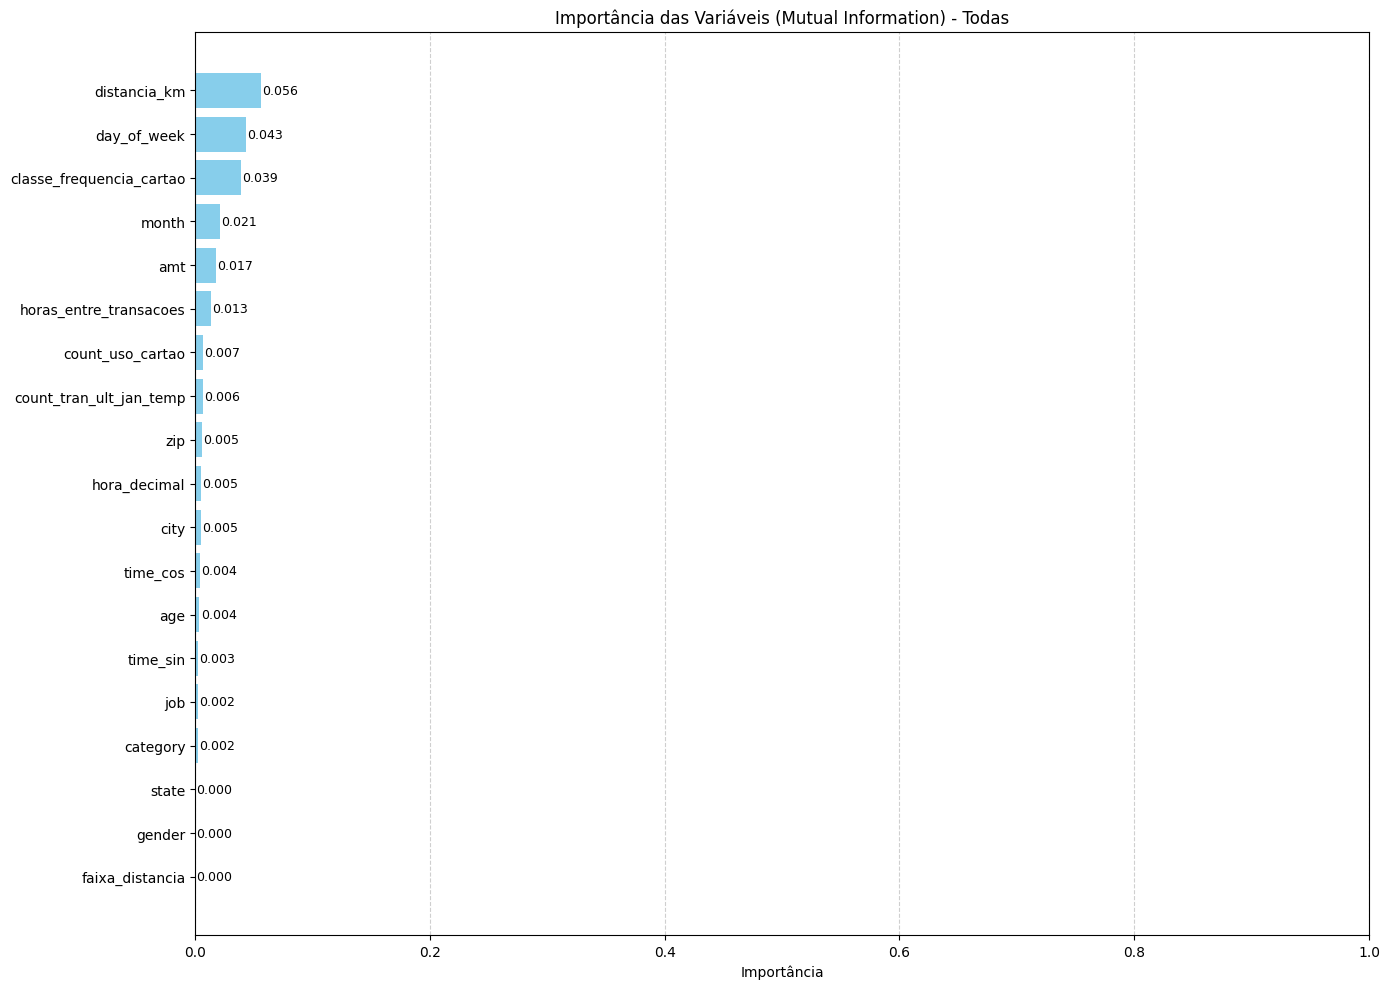

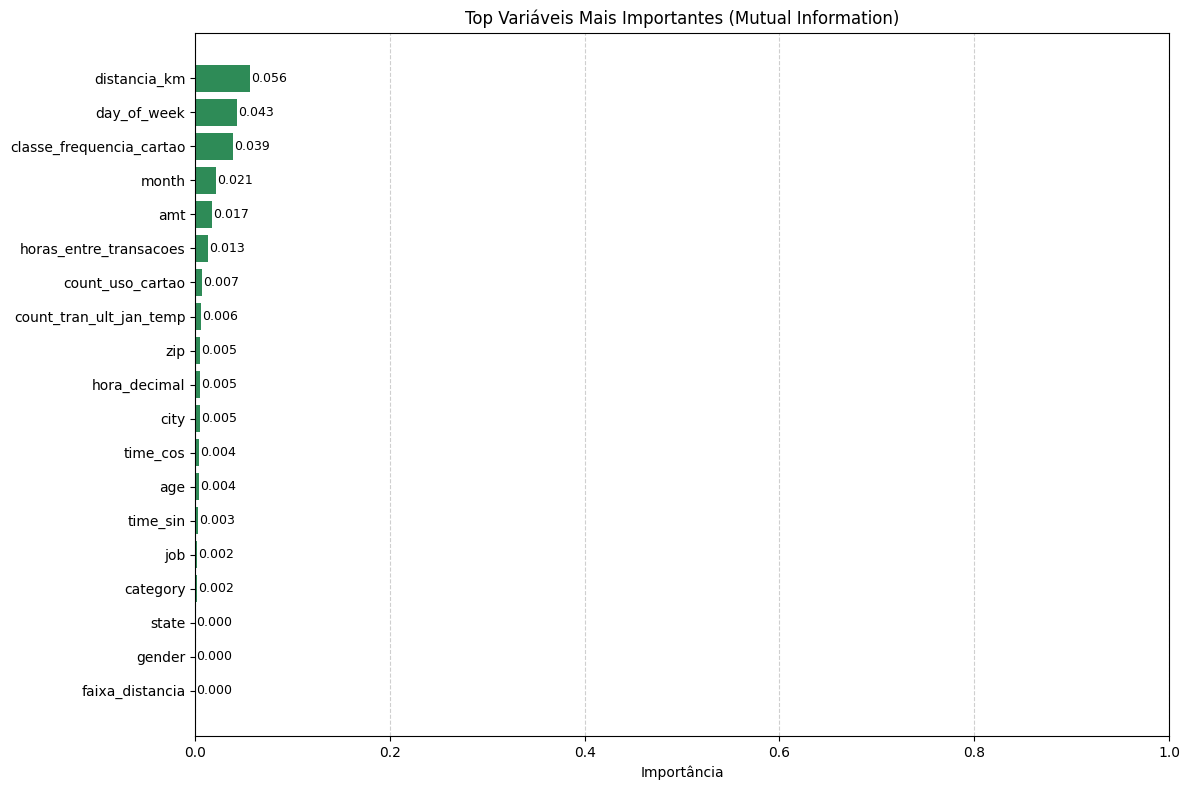

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif


warnings.filterwarnings("ignore")

# C√≥pia da base original
df_temp = df_train.copy()

# Define as vari√°veis obrigat√≥rias que sempre ficam
keep_vars = ['bin', 'period', target, 'merchant', 'street']  # Vari√°veis obrigat√≥rias

# Define X e y novamente
X = df_temp.drop(columns=keep_vars, errors='ignore')  # Remover as vari√°veis de keep_vars
y = df_temp[target]

# Separa as vari√°veis categ√≥ricas e num√©ricas
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
#print(cat_cols)
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
#print(num_cols)


# Garante que X j√° est√° sem as keep_vars
X_mi = X.copy()
y = df_temp[target]

# Recalcula as colunas categ√≥ricas e num√©ricas (sem keep_vars)
cat_cols_mi = X_mi.select_dtypes(exclude=[np.number]).columns.tolist()
num_cols_mi = X_mi.select_dtypes(include=[np.number]).columns.tolist()

# 1. Codifica vari√°veis categ√≥ricas com OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_mi[cat_cols_mi] = encoder.fit_transform(X_mi[cat_cols_mi])

# 2. Normaliza vari√°veis num√©ricas
scaler = StandardScaler()
X_mi[num_cols_mi] = scaler.fit_transform(X_mi[num_cols_mi])

# 3. Calcula Mutual Information
mi = mutual_info_classif(
    X_mi,
    y,
    discrete_features=[col in cat_cols_mi for col in X_mi.columns],
    random_state=42
)

# 4. Organiza os resultados
mi_importances = pd.Series(mi, index=X_mi.columns, name="MutualInformation")

# 5. Seleciona as top 30 vari√°veis mais importantes
top = mi_importances.sort_values(ascending=False).head(30).index.tolist()

# 6. Atualiza df_train com as top vari√°veis + vari√°veis obrigat√≥rias
df_train = df_temp[top + keep_vars]



# üìä Gr√°fico com todas as vari√°veis num√©ricas
plt.figure(figsize=(14, 10))
mi_sorted = mi_importances.sort_values(ascending=True)
bars = plt.barh(mi_sorted.index, mi_sorted.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
             va='center', fontsize=9)

plt.title("Import√¢ncia das Vari√°veis (Mutual Information) - Todas")
plt.xlabel("Import√¢ncia")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# üìä Gr√°fico com apenas as top vari√°veis
plt.figure(figsize=(14, 10))
top_sorted = mi_importances[top].sort_values(ascending=True)
bars_top = plt.barh(top_sorted.index, top_sorted.values, color='seagreen')

for bar in bars_top:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
             va='center', fontsize=9)

plt.title("Top Vari√°veis Mais Importantes (Mutual Information)")
plt.xlabel("Import√¢ncia")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
df_train.head(5)

# Outliers 

* AQUI SE ANALISOU OS OUTLIERS PARA TRATAMENTOS POSTERIOES, DENTRO DOS FOLDS, NO TREINAMENTO FINAL, E SEMPRE OBSERVANDO O CUIDADO PARA VAZAMENTO DE DADOS ENTRE TREINO E TESTE. 



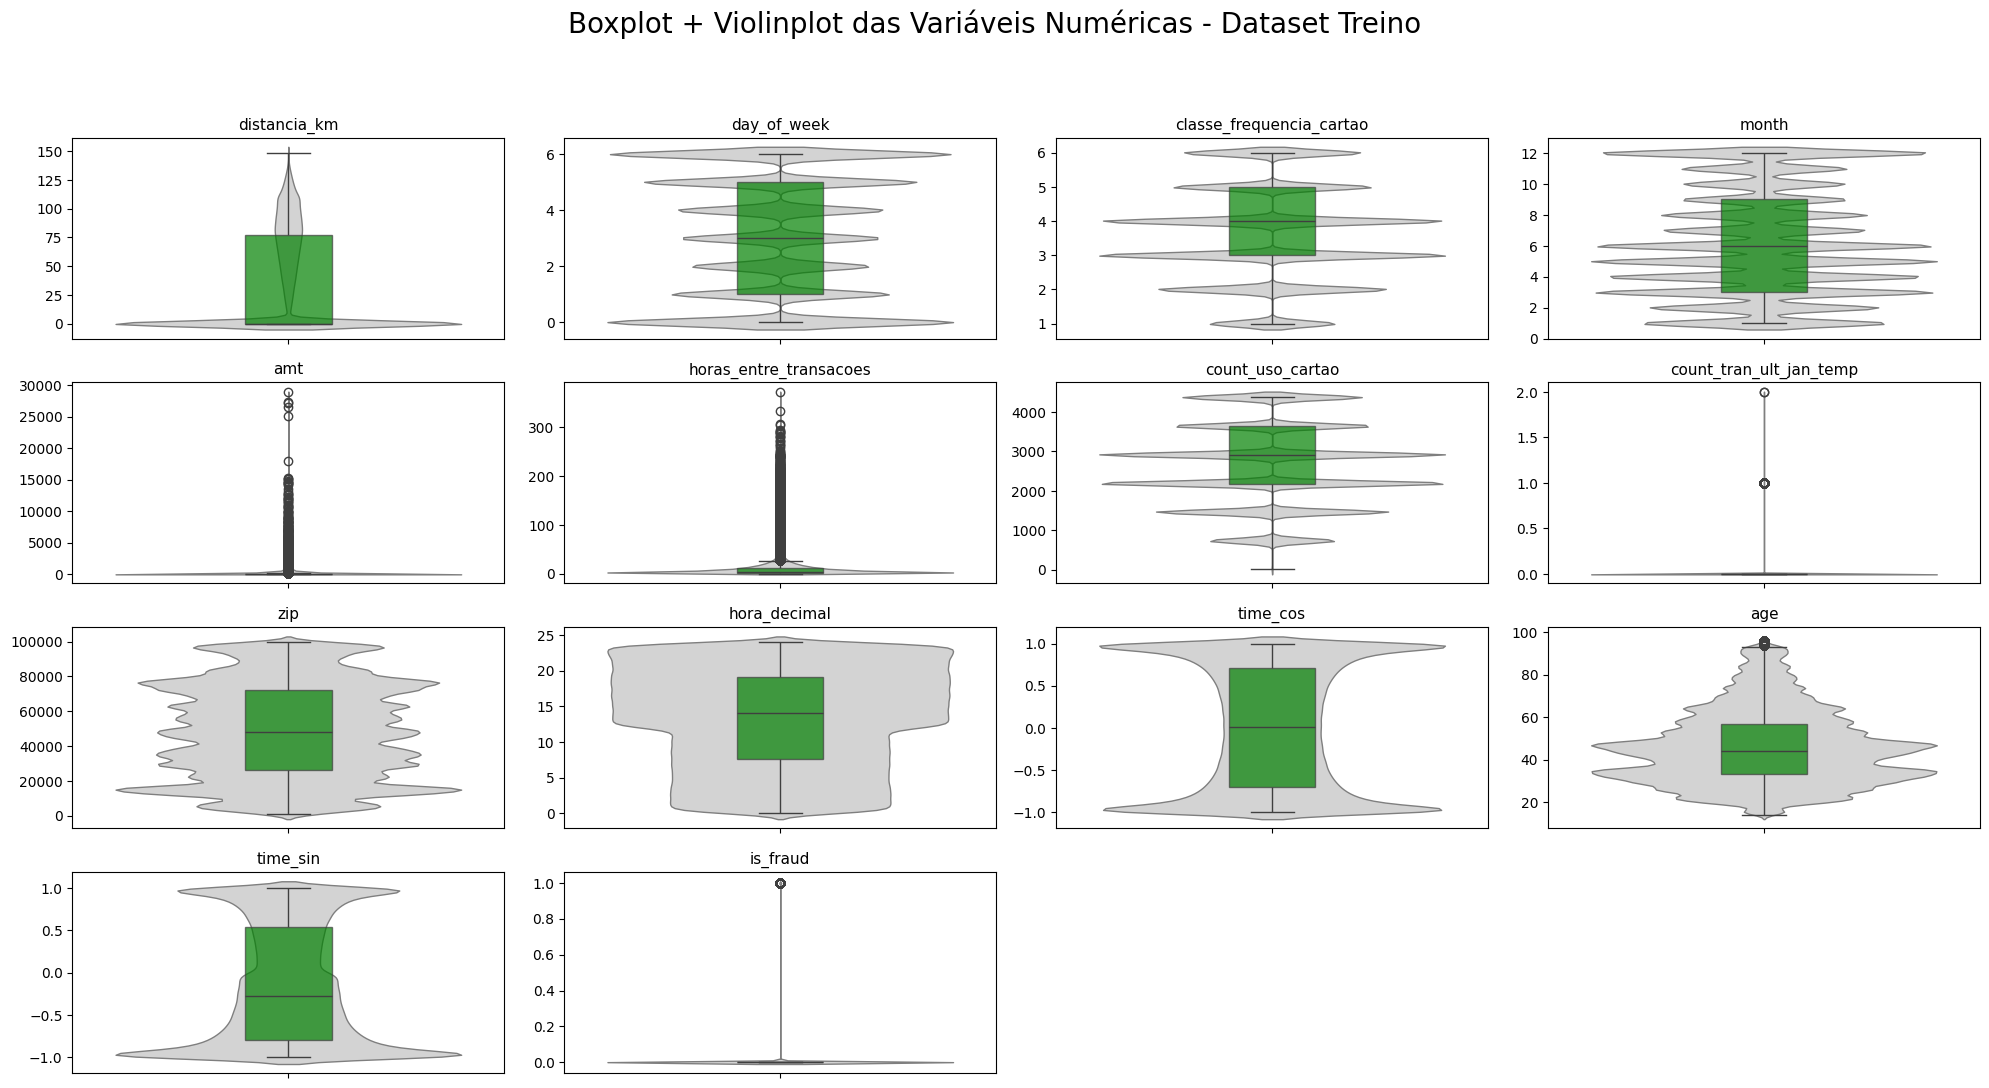

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# lista das vari√°veis num√©ricas que voc√™ quer visualizar
variaveis = df_train.select_dtypes(include='number').columns.tolist()

# tamanho da figura
plt.figure(figsize=(20, 16))

# loop de cria√ß√£o de subplots com boxplot + violinplot
for i, var in enumerate(variaveis):
    plt.subplot(6, 4, i + 1)  # define a grade de 6 linhas x 4 colunas (ajuste conforme o n√∫mero de vari√°veis)
    
    # violinplot com largura menor para n√£o sobrepor tanto
    sns.violinplot(y=df_train[var], inner=None, color='lightgray', linewidth=1)
    
    # boxplot por cima
    sns.boxplot(y=df_train[var],
                boxprops=dict(facecolor='green', alpha=0.7),
                width=0.2)
    
    plt.title(f'{var}', fontsize=11)
    plt.ylabel('')

# t√≠tulo geral
plt.suptitle('Boxplot + Violinplot das Vari√°veis Num√©ricas - Dataset Treino', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# Estudo com Optuna: Melhores hiperparametros

In [76]:
print("qtd de variaveis e observacoes usados no treino:",df_train.shape)

qtd de variaveis e observacoes usados no treino: (1296675, 24)


In [77]:
# Mantendo apenas as colunas presentes em df_train
# isso porque as tratativas de mutual importance foram feitos na copia do df_train e isso ocorreu depois da separacao de treino e teste, entao e a unica transformcao que acabou nao pegando no X_trian e X_test

colunas_validas = df_train.columns.intersection(X_train.columns)

# Filtrando X_train e X_test
X_train = X_train[colunas_validas]
X_test = X_test[colunas_validas]


In [78]:
X_train.head(5)

distancia_km  day_of_week  classe_frequencia_cartao  month    amt  horas_entre_transacoes  count_uso_cartao  count_tran_ult_jan_temp    zip  hora_decimal            city  time_cos  age  time_sin                                job       category state gender faixa_distancia     bin            period                      merchant                        street
0b242abb623afc578575680df30655b9          0.00            1                         4      1   4.97                       0              2927                        0  28654          0.01  Moravian Falls      1.00   31      0.00          Psychologist, counselling       misc_net    NC      F   Sem dist√¢ncia  270318  Madrugada In√≠cio          Rippin, Kub and Mann                561 Perry Cove
1f76529f8574734946361c461b024d99         30.21            1                         6      1 107.23                       0              4362                        0  99160          0.01          Orient      1.00   41      0.00  Special educational needs teacher    grocery_pos    WA      F       0 a 50 km  630423  Madrugada In√≠cio     Heller, Gutmann and Zieme  43039 Riley Greens Suite 393
a1a22d70485983eac12b5b88dad1cf95          0.00            1                         1      1 220.11                       0               735                        0  83252          0.01      Malad City      1.00   57      0.00        Nature conservation officer  entertainment    ID      M   Sem dist√¢ncia  388594  Madrugada In√≠cio                Lind-Buckridge      594 White Dale Suite 530
6b849c168bdad6f867558c3793159a81         95.67            1                         1      1  45.00                       0               743                        0  59632          0.02         Boulder      1.00   52      0.01                    Patent attorney  gas_transport    MT      M     50 a 100 km  353409  Madrugada In√≠cio  Kutch, Hermiston and Farrell   9443 Cynthia Court Apt. 038
a41d7549acf90789359a9aa5346dcb46         77.56            1                         4      1  41.96                       0              2922                        0  24433          0.05        Doe Hill      1.00   33      0.01     Dance movement psychotherapist       misc_pos    VA      M     50 a 100 km  375534  Madrugada In√≠cio                 Keeling-Crist              408 Bradley Rest


üìä Analisando a vari√°vel: distancia_km
--------------------------------------------------
Estat√≠stica do teste (D‚ÄôAgostino): 1043377.2052
p-valor: 0.0000
‚ùå Pode n√£o seguir uma distribui√ß√£o normal.
Estat√≠stica do teste Anderson-Darling: 120041.1560
Valores Cr√≠ticos: [0.576 0.656 0.787 0.918 1.092]
N√≠veis de signific√¢ncia: [15.  10.   5.   2.5  1. ]
‚ùå A distribui√ß√£o n√£o √© normal.
Assimetria (Skew): 0.6116
Curtose (Kurtosis): -1.1812

üìä Analisando a vari√°vel: day_of_week
--------------------------------------------------
Estat√≠stica do teste (D‚ÄôAgostino): 9333101.6330
p-valor: 0.0000
‚ùå Pode n√£o seguir uma distribui√ß√£o normal.
Estat√≠stica do teste Anderson-Darling: 46969.4490
Valores Cr√≠ticos: [0.576 0.656 0.787 0.918 1.092]
N√≠veis de signific√¢ncia: [15.  10.   5.   2.5  1. ]
‚ùå A distribui√ß√£o n√£o √© normal.
Assimetria (Skew): -0.0785
Curtose (Kurtosis): -1.4450

üìä Analisando a vari√°vel: classe_frequencia_cartao
--------------------------------

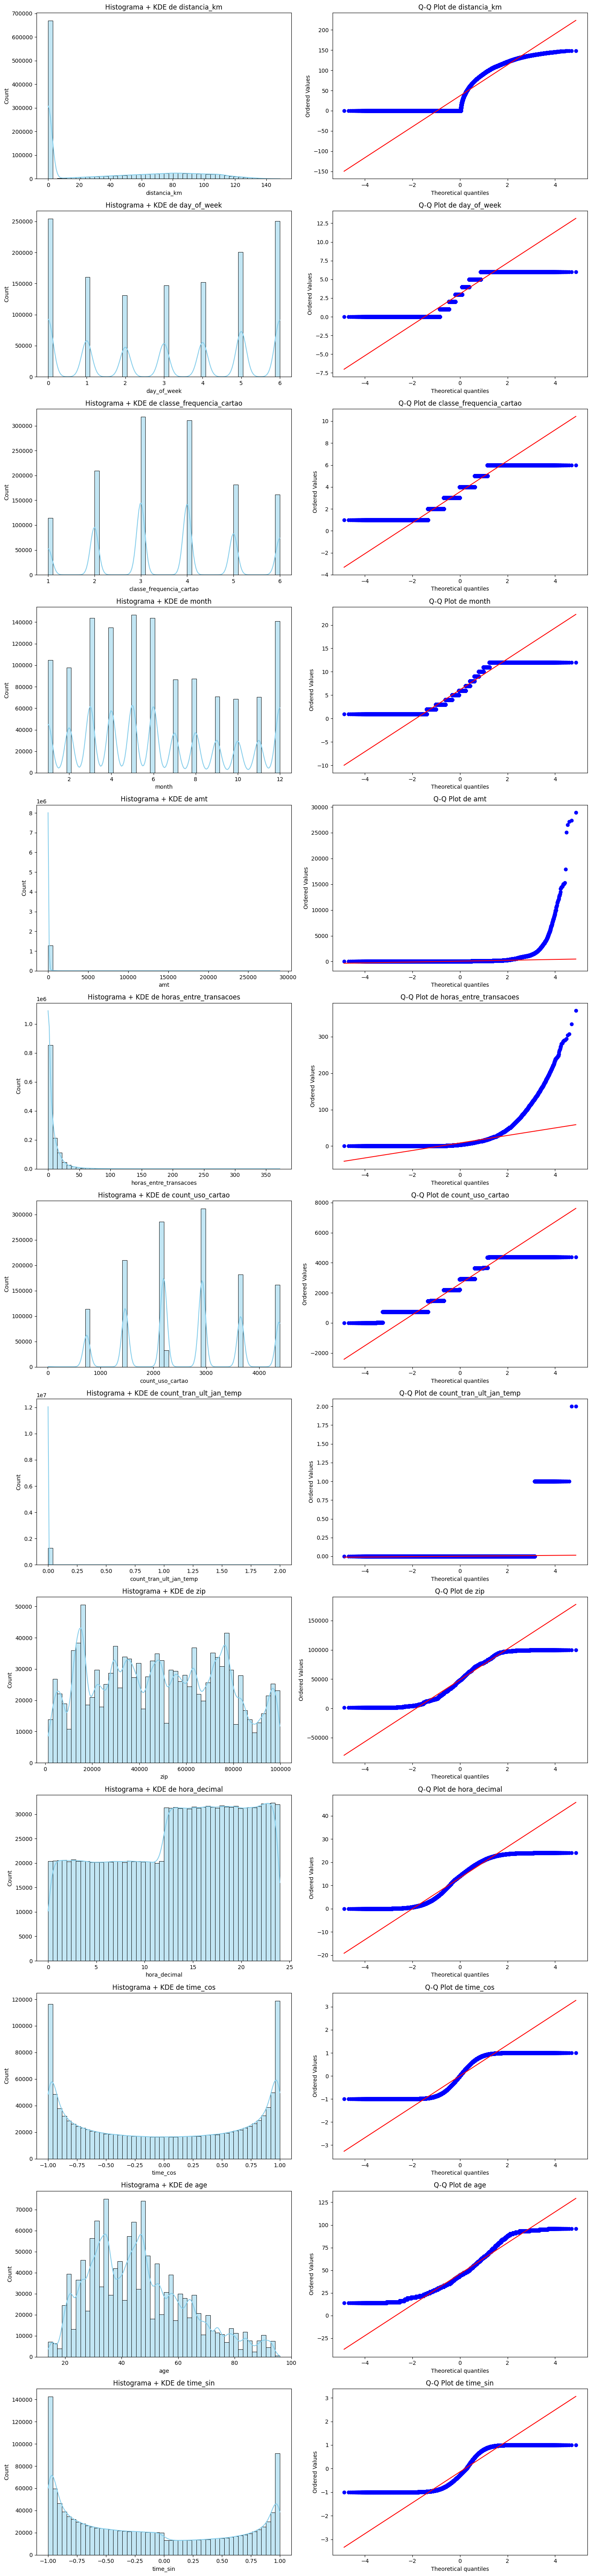

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#testando a normalidade dados colunas numericas, 

numerical_cols = X_train.select_dtypes(include='number').columns.tolist() #lista de variaveis numericas


def analisar_normalidade(df, colunas):

    ''' 
    Funcao que analisa as variaveis numericas antes das trasnformacoes, principalmente para determinar qual tratamento de outlier
    sera necessario no momento das transformacoes do pipeline para essas varaiveis e a determinacao disso na classe de transformacao
    de outlier. Alem de melhorar a compreensao das variaveis.  

    '''
    n_cols = 2  # N√∫mero de colunas para os gr√°ficos
    n_rows = (len(colunas) * 2 + 1) // n_cols  # Ajusta o n√∫mero de linhas para acomodar todos os gr√°ficos

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Flatten para facilitar a indexa√ß√£o dos subgr√°ficos

    for i, col in enumerate(colunas):
        ax_hist = axes[2 * i]  # Posi√ß√£o do histograma + KDE
        ax_qq = axes[2 * i + 1]  # Posi√ß√£o do Q-Q plot

        print(f"\nüìä Analisando a vari√°vel: {col}")
        print("-" * 50)
        
        # Teste de D‚ÄôAgostino e Pearson
        try:
            stat, p_value = stats.normaltest(df[col].dropna())
            print(f"Estat√≠stica do teste (D‚ÄôAgostino): {stat:.4f}")
            print(f"p-valor: {p_value:.4f}")
            if p_value > 0.05:
                print("‚úÖ Parece seguir uma distribui√ß√£o normal.")
            else:
                print("‚ùå Pode n√£o seguir uma distribui√ß√£o normal.")
        except Exception as e:
            print(f"Erro ao executar o teste D‚ÄôAgostino: {e}")
            continue

        # Teste Anderson-Darling
        try:
            result = stats.anderson(df[col].dropna())
            print(f"Estat√≠stica do teste Anderson-Darling: {result.statistic:.4f}")
            print("Valores Cr√≠ticos:", result.critical_values)
            print("N√≠veis de signific√¢ncia:", result.significance_level)
            if result.statistic < result.critical_values[2]:
                print("‚úÖ Distribui√ß√£o normal (n√≠vel de signific√¢ncia de 5%).")
            else:
                print("‚ùå A distribui√ß√£o n√£o √© normal.")
        except Exception as e:
            print(f"Erro ao executar o teste Anderson-Darling: {e}")
            continue

        # C√°lculo de skew (assimetria) e kurtosis (curtose)
        skew = df[col].dropna().skew()
        kurtosis = df[col].dropna().kurtosis()
        print(f"Assimetria (Skew): {skew:.4f}")
        print(f"Curtose (Kurtosis): {kurtosis:.4f}")

        # Plot Histograma + KDE
        sns.histplot(df[col].dropna(), kde=True, bins=50, color='skyblue', ax=ax_hist)
        ax_hist.set_title(f"Histograma + KDE de {col}")

        # Q-Q Plot
        stats.probplot(df[col].dropna(), dist="norm", plot=ax_qq)
        ax_qq.set_title(f"Q-Q Plot de {col}")

    # Ajustar layout
    plt.tight_layout()
    plt.show()


#analisando 
analisar_normalidade(X_train, numerical_cols)





In [80]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
import pandas as pd





from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mapping_ = None

    def fit(self, X, y):
        col = X.columns[0]
        self.mapping_ = X[col].to_frame().join(pd.Series(y, name='target')).groupby(col)['target'].mean()
        return self

    def transform(self, X):
        X_transformed = X.copy()
        col = X.columns[0]
        X_transformed[col] = X_transformed[col].map(self.mapping_)
        X_transformed[col].fillna(0, inplace=True)
        return X_transformed






from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X):
        encoded = self.encoder.transform(X)
        col_names = self.encoder.get_feature_names_out(X.columns)
        return pd.DataFrame(encoded, columns=col_names, index=X.index)







class OutlierFlagTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3.0):
        self.threshold = threshold
        self.mean_ = None
        self.std_ = None

    def fit(self, X, y=None):
        self.mean_ = X.mean()
        self.std_ = X.std()
        return self

    def transform(self, X):
        z_scores = np.abs((X - self.mean_) / self.std_)
        outliers_flag = (z_scores > self.threshold).astype(int)
        outliers_flag.columns = [f"{col}_outlier" for col in X.columns]
        return outliers_flag
    



#ALTERNATIVA A SE TESTAR NO LUGAR DE OutlierFlagTransformer, POIS ELA E AFETADA PELA NORMALIDADE DAS VARAIVEIS POR CAUSA DA IMPLEMETNACAO COM BASE NO Z-SCORE 
class OutlierPercentilFlagTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, limites=(0.01, 0.01)):
        """
        Inicializa o transformador com limites inferiores e superiores para outliers, baseados em percentis.
        
        Par√¢metros:
            limites (tuple): Limites inferiores e superiores para identificar outliers com base em percentis (ex: (0.01, 0.01) = 1%).
        """
        self.limites = limites
        self.percentis_ = None

    def fit(self, X, y=None):
        """
        Ajusta o transformador aos dados de entrada, calculando os percentis para cada vari√°vel num√©rica.
        
        Par√¢metros:
            X (pd.DataFrame): Dados de entrada para ajuste (n√£o √© utilizado no c√°lculo, mas necess√°rio para o fit).
        
        Retorna:
            self: O pr√≥prio transformador.
        """
        # Calculando os percentis para cada vari√°vel num√©rica
        self.percentis_ = {}
        for col in X.select_dtypes(include=[np.number]).columns:
            p_inf = X[col].quantile(self.limites[0])
            p_sup = X[col].quantile(1 - self.limites[1])
            self.percentis_[col] = (p_inf, p_sup)

        return self

    def transform(self, X):
        """
        Transforma os dados de entrada, criando flags bin√°rias para os outliers com base em percentis.
        
        Par√¢metros:
            X (pd.DataFrame): Dados a serem transformados, com os quais as flags de outliers ser√£o geradas.
        
        Retorna:
            pd.DataFrame: DataFrame com as novas colunas de outliers adicionadas.
        """
        X_outliers = X.copy()
        
        for col, (p_inf, p_sup) in self.percentis_.items():
            nova_coluna = f'{col}_outlier'
            X_outliers[nova_coluna] = ((X_outliers[col] < p_inf) | (X_outliers[col] > p_sup)).astype(int)
        
        return X_outliers
    


from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders.woe import WOEEncoder



class WoeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        """
        cols: lista das colunas para aplicar o WOEEncoder.
        """
        self.cols = cols
        self.encoders_ = {}

    def fit(self, X, y):
        for col in self.cols:
            encoder = WOEEncoder()
            encoder.fit(X[col], y)
            self.encoders_[col] = encoder
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.cols:
            encoder = self.encoders_[col]
            X_transformed[col] = encoder.transform(X_transformed[col])
        return X_transformed

    

* WOEEncoder() transforma vari√°veis categ√≥ricas em valores num√©ricos com base na raz√£o entre eventos (ex: fraudes) e n√£o eventos, usando log-odds. Quanto maior o valor de WOE, maior a associa√ß√£o com o evento (fraude); quanto menor, maior a associa√ß√£o com a aus√™ncia do evento. Como o WOE j√° tem interpreta√ß√£o estat√≠stica, n√£o deve ser normalizado com StandardScaler, pois isso distorce seu significado.

In [83]:
print("Colunas dispon√≠veis em X antes do pipeline:")
for col in X_train.columns:
    print(f"{col} - {X_train[col].dtype}")


Colunas dispon√≠veis em X antes do pipeline:
distancia_km - float64
day_of_week - int32
classe_frequencia_cartao - int64
month - int32
amt - float64
horas_entre_transacoes - int64
count_uso_cartao - int64
count_tran_ult_jan_temp - int64
zip - int64
hora_decimal - float64
city - object
time_cos - float64
age - int64
time_sin - float64
job - object
category - object
state - object
gender - object
faixa_distancia - category
bin - object
period - object
merchant - object
street - object


In [89]:
numerical_cols



['distancia_km',
 'day_of_week',
 'classe_frequencia_cartao',
 'month',
 'amt',
 'horas_entre_transacoes',
 'count_uso_cartao',
 'count_tran_ult_jan_temp',
 'zip',
 'hora_decimal',
 'time_cos',
 'age',
 'time_sin']

In [ ]:
from sklearn.pipeline import FeatureUnion, Pipeline
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             roc_auc_score, balanced_accuracy_score, matthews_corrcoef)
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef
import optuna
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import torch
import warnings
warnings.filterwarnings("ignore", message="A module that was compiled using NumPy 1.x cannot be run in NumPy 2.1.3")
 
#reclama por incompatibilidade com aversao do numpy antes e do numpy que o torch usa, se der problema mais pra 
# frente so comentar esse trecho, instalar as lib nas versoes novas e ser feliz 


# Verifica se h√° GPU dispon√≠vel
use_gpu = torch.cuda.is_available()
device = "cuda" if use_gpu else "cpu"
tree_method_ = "gpu_hist" if use_gpu else "hist"

print(f"Usando GPU: {use_gpu}")
print(f"M√©todo de √°rvore: {tree_method_}")



# TEMPLATE COMPLETO COM PIPELINE + OPTUNA (CLASSE RARA)


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef
import optuna
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import time


# ==================== Vari√°veis Globais ==================== 
threshold = 0.5
n_trials_ = 5
n_splits_ = 5

weights_skf = {
    'Accuracy': 0.0,          # Irrelevante em dados desbalanceados (pode mascarar a performance real)
    'f1': 0.05,               # M√©dia harm√¥nica entre precis√£o e recall (bom equil√≠brio)
    'precision': 0.45,        # Indica a propor√ß√£o de positivos corretos (penaliza falsos positivos)
    'recall': 0.35,           # Mede quantos positivos reais foram capturados (importante em fraudes)
    'auc': 0.05,              # Mede a capacidade geral de separa√ß√£o entre classes
    'balanced_acc': 0.0,      # M√©dia das acur√°cias por classe (corrige o vi√©s do desbalanceamento)
    'mcc': 0.1                # Avalia correla√ß√£o entre predi√ß√µes e r√≥tulos (robusto para desbalanceamento)
}


# ==================== Fun√ß√£o de Gera√ß√£o de Folds e Treinamento ====================

def generate_folds_and_train(trial, X, y, pipeline, n_splits=n_splits_, smote=None):
    global weights_skf  # dicion√°rio com os pesos de cada m√©trica

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    weighted_scores = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        start_time = time.time()

        X_train, X_val = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
        y_train, y_val = y.iloc[train_idx].copy(), y.iloc[val_idx].copy()

        assert set(X.columns) == set(X_train.columns), "Colunas inconsistentes entre X e os folds!"

        if smote is not None:
            X_train, y_train = smote.fit_resample(X_train, y_train)

        pipeline.fit(X_train, y_train)
        probs = pipeline.predict_proba(X_val)[:, 1]
        preds = (probs >= threshold).astype(int)

        # M√©tricas individuais
        acc          = accuracy_score(y_val, preds)
        f1           = f1_score(y_val, preds)
        precision    = precision_score(y_val, preds, zero_division=0)
        recall       = recall_score(y_val, preds)
        auc          = roc_auc_score(y_val, probs)
        balanced_acc = balanced_accuracy_score(y_val, preds)
        mcc          = matthews_corrcoef(y_val, preds)

        # Score ponderado (forma expl√≠cita)
        fold_weighted_score = (
            weights_skf.get('Accuracy', 0)     * acc +
            weights_skf.get('f1', 0)           * f1 +
            weights_skf.get('precision', 0)    * precision +
            weights_skf.get('recall', 0)       * recall +
            weights_skf.get('auc', 0)          * auc +
            weights_skf.get('balanced_acc', 0) * balanced_acc +
            weights_skf.get('mcc', 0)          * mcc
        )

        weighted_scores.append(fold_weighted_score)

        elapsed = time.time() - start_time
        print(
            f"üìÅ Fold {fold}/{n_splits} | "
            f"Accuracy: {acc:.4f} | "
            f"F1: {f1:.4f} | "
            f"Precision: {precision:.4f} | "
            f"Recall: {recall:.4f} | "
            f"AUC: {auc:.4f} | "
            f"Balanced Acc: {balanced_acc:.4f} | "
            f"MCC: {mcc:.4f} | "
            f"Weighted Score: {fold_weighted_score:.4f} | "
            f"Tempo: {elapsed:.2f}s"
        )

    # Retorna a m√©dia das pontua√ß√µes ponderadas calculadas para cada fold
    return np.mean(weighted_scores)





from sklearn.pipeline import FeatureUnion, Pipeline




# ==================== Fun√ß√µes Objetivo para Cada Modelo ====================

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder

# Listas organizadas de colunas
woe_cols = ['city', 'job', 'merchant', 'category', 'faixa_distancia']
target_enc_cols = ['bin', 'street', 'zip', 'state'] 
onehot_cols = ['period', 'gender']

# Remover 'zip' da lista de num√©ricas
numerical_cols_auto = [col for col in numerical_cols if col != 'zip']
numericas = numerical_cols_auto  # DEPOIOS DE MAPEAR AS NUMERICAS FINAIS MUDAR PARA O MESMO PADRAO DAS OUTRAS 

def build_pipeline(model):
    preprocessor = ColumnTransformer(transformers=[
        # WOE apenas nas colunas desejadas
        ('woe', WoeTransformer(cols=woe_cols), woe_cols),
        
        # Target Encoding
        # Target Encoding com category_encoders (sem vazamento)
        ('target_enc', TargetEncoder(cols=target_enc_cols, smoothing=5), target_enc_cols), #cv=5 se quiser deixar mais robusto, mas pesa maais
        
        # One-hot encoding
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols),
        
        # Flags de outliers com base em percentis
        ('outliers_percentil', OutlierPercentilFlagTransformer(limites=(0.01, 0.01)), numericas),

        # Alternativa com z-score - problema: depende de os dados seguirem distribuicao normal (por isso o teste de normalidade na def analisar_normalidade anteriormente )
        #('outliers', OutlierFlagTransformer(), numerical_cols),  
        
        # Scaler aplicado apenas nas vari√°veis num√©ricas
        ('scaler', StandardScaler(), numericas)
    ])
    
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    return pipeline








def objective_xgb(trial):
    start_time = time.time()
    print(f"üöÄ Iniciando trial {trial.number} para XGBoost...")
    model = XGBClassifier(
        objective='binary:logistic',
        tree_method=trial.suggest_categorical("tree_method", ["gpu_hist"]),
        use_label_encoder=False,
        eval_metric=trial.suggest_categorical("eval_metric", ["aucpr", "logloss"]),
        n_estimators=trial.suggest_int("n_estimators", 500, 3000),
        learning_rate=trial.suggest_float("learning_rate", 0.001, 0.05, log=True),
        max_depth=trial.suggest_int("max_depth", 3, 15),
        min_child_weight=trial.suggest_float("min_child_weight", 1, 20),
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 1.0),
        gamma=trial.suggest_float("gamma", 0, 10),
        reg_alpha=trial.suggest_float("reg_alpha", 0, 5),
        reg_lambda=trial.suggest_float("reg_lambda", 0, 5),
        scale_pos_weight=trial.suggest_float("scale_pos_weight", 1, 10),
        random_state=42,
        n_jobs=-1
    )

    pipeline = build_pipeline(model)

    try:
        score = generate_folds_and_train(trial, X_train, y_train, pipeline)
        elapsed_time = time.time() - start_time
        print(f"‚úÖ Trial {trial.number} finalizado | Score: {score:.4f} | Tempo: {elapsed_time:.2f} segundos")
        return score
    except Exception as e:
        elapsed_time = time.time() - start_time
        print(f"‚ùå Erro no trial {trial.number} | Tempo at√© o erro: {elapsed_time:.2f} segundos")
        print(f"Tipo de erro: {type(e).__name__} | Mensagem: {e}")
        raise e




def objective_knn(trial):
    start_time = time.time()
    print(f"üöÄ Iniciando trial {trial.number} para KNN...")
    model = KNeighborsClassifier(
        n_neighbors=trial.suggest_int("n_neighbors", 3, 20),
        weights=trial.suggest_categorical("weights", ["uniform", "distance"]),
        p=trial.suggest_int("p", 1, 2)
    )

    pipeline = build_pipeline(model)

    try:
        score = generate_folds_and_train(trial, X_train, y_train, pipeline)
        elapsed_time = time.time() - start_time
        print(f"‚úÖ Trial {trial.number} finalizado | Score: {score:.4f} | Tempo: {elapsed_time:.2f} segundos")
        return score
    except Exception as e:
        elapsed_time = time.time() - start_time
        print(f"‚ùå Erro no trial {trial.number} | Tempo at√© o erro: {elapsed_time:.2f} segundos")
        print(f"Tipo de erro: {type(e).__name__} | Mensagem: {e}")
        raise e



def objective_nn(trial):
    start_time = time.time()
    print(f"üöÄ Iniciando trial {trial.number} para MLP...")
    model = MLPClassifier(
        hidden_layer_sizes=trial.suggest_int("hidden_layer_sizes", 50, 300),
        activation=trial.suggest_categorical("activation", ["relu", "tanh"]),
        solver=trial.suggest_categorical("solver", ["adam", "sgd"]),
        alpha=trial.suggest_float("alpha", 0.0001, 0.1, log=True),
        max_iter=500,
        random_state=42
    )

    pipeline = build_pipeline(model)

    try:
        score = generate_folds_and_train(trial, X_train, y_train, pipeline)
        elapsed_time = time.time() - start_time
        print(f"‚úÖ Trial {trial.number} finalizado | Score: {score:.4f} | Tempo: {elapsed_time:.2f} segundos")
        return score
    except Exception as e:
        elapsed_time = time.time() - start_time
        print(f"‚ùå Erro no trial {trial.number} | Tempo at√© o erro: {elapsed_time:.2f} segundos")
        print(f"Tipo de erro: {type(e).__name__} | Mensagem: {e}")
        raise e



models = {
    "KNN": objective_knn,
    "XGBoost": objective_xgb,
    "NN": objective_nn
}

best_hyperparams = {}

def optimize_all_models():
    for model_name, objective_func in models.items():
        print(f"üîç Iniciando otimiza√ß√£o para o modelo: {model_name}")
        study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
        study.optimize(objective_func, n_trials=n_trials_)

        best_params = study.best_params
        best_hyperparams[model_name] = best_params

        print(f"üìä MELHORES HIPERPAR√ÇMETROS PARA O MODELO {model_name}")
        print("‚ïê" * 60)
        for param, value in best_params.items():
            print(f"{param:<25}{value:<15}")
        print("‚ïê" * 60)


optimize_all_models()



[I 2025-04-21 16:45:35,135] A new study created in memory with name: no-name-f5c5a830-9bd9-49fe-b335-8d74d1720f5f


Usando GPU: True
M√©todo de √°rvore: gpu_hist
üîç Iniciando otimiza√ß√£o para o modelo: KNN
üöÄ Iniciando trial 0 para KNN...
üìÅ Fold 1/5 | Accuracy: 0.9968 | F1: 0.6777 | Precision: 0.8265 | Recall: 0.5743 | AUC: 0.9445 | Balanced Acc: 0.7868 | MCC: 0.6875 | Weighted Score: 0.7228 | Tempo: 1445.43s
üìÅ Fold 2/5 | Accuracy: 0.9969 | F1: 0.6825 | Precision: 0.8440 | Recall: 0.5730 | AUC: 0.9331 | Balanced Acc: 0.7862 | MCC: 0.6940 | Weighted Score: 0.7305 | Tempo: 1463.23s
üìÅ Fold 3/5 | Accuracy: 0.9968 | F1: 0.6709 | Precision: 0.8345 | Recall: 0.5610 | AUC: 0.9297 | Balanced Acc: 0.7802 | MCC: 0.6827 | Weighted Score: 0.7202 | Tempo: 1495.85s
üìÅ Fold 4/5 | Accuracy: 0.9968 | F1: 0.6728 | Precision: 0.8388 | Recall: 0.5616 | AUC: 0.9346 | Balanced Acc: 0.7805 | MCC: 0.6849 | Weighted Score: 0.7229 | Tempo: 1440.74s
üìÅ Fold 5/5 | Accuracy: 0.9969 | F1: 0.6839 | Precision: 0.8306 | Recall: 0.5812 | AUC: 0.9349 | Balanced Acc: 0.7903 | MCC: 0.6934 | Weighted Score: 0.7275 | Tem

[I 2025-04-21 18:47:28,710] Trial 0 finished with value: 0.7247627842174678 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.7247627842174678.


üöÄ Iniciando trial 1 para KNN...
üìÅ Fold 1/5 | Accuracy: 0.9967 | F1: 0.6682 | Precision: 0.7950 | Recall: 0.5763 | AUC: 0.9473 | Balanced Acc: 0.7877 | MCC: 0.6753 | Weighted Score: 0.7078 | Tempo: 1419.72s
üìÅ Fold 2/5 | Accuracy: 0.9967 | F1: 0.6698 | Precision: 0.8114 | Recall: 0.5703 | AUC: 0.9383 | Balanced Acc: 0.7848 | MCC: 0.6787 | Weighted Score: 0.7130 | Tempo: 1430.36s
üìÅ Fold 3/5 | Accuracy: 0.9967 | F1: 0.6577 | Precision: 0.8099 | Recall: 0.5536 | AUC: 0.9352 | Balanced Acc: 0.7764 | MCC: 0.6681 | Weighted Score: 0.7047 | Tempo: 1432.90s
üìÅ Fold 4/5 | Accuracy: 0.9968 | F1: 0.6667 | Precision: 0.8229 | Recall: 0.5603 | AUC: 0.9381 | Balanced Acc: 0.7798 | MCC: 0.6775 | Weighted Score: 0.7144 | Tempo: 1422.00s


[I 2025-04-21 20:46:31,367] Trial 1 finished with value: 0.7103818642329298 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7247627842174678.


üìÅ Fold 5/5 | Accuracy: 0.9967 | F1: 0.6716 | Precision: 0.8041 | Recall: 0.5766 | AUC: 0.9379 | Balanced Acc: 0.7879 | MCC: 0.6794 | Weighted Score: 0.7120 | Tempo: 1437.28s
‚úÖ Trial 1 finalizado | Score: 0.7104 | Tempo: 7142.61 segundos
üöÄ Iniciando trial 2 para KNN...
üìÅ Fold 1/5 | Accuracy: 0.9962 | F1: 0.5919 | Precision: 0.7852 | Recall: 0.4750 | AUC: 0.9238 | Balanced Acc: 0.7371 | MCC: 0.6091 | Weighted Score: 0.6563 | Tempo: 325.98s
üìÅ Fold 2/5 | Accuracy: 0.9962 | F1: 0.5836 | Precision: 0.7873 | Recall: 0.4637 | AUC: 0.9197 | Balanced Acc: 0.7315 | MCC: 0.6025 | Weighted Score: 0.6520 | Tempo: 322.55s
üìÅ Fold 3/5 | Accuracy: 0.9961 | F1: 0.5762 | Precision: 0.7932 | Recall: 0.4524 | AUC: 0.9166 | Balanced Acc: 0.7258 | MCC: 0.5974 | Weighted Score: 0.6497 | Tempo: 319.63s
üìÅ Fold 4/5 | Accuracy: 0.9961 | F1: 0.5708 | Precision: 0.7894 | Recall: 0.4470 | AUC: 0.9172 | Balanced Acc: 0.7232 | MCC: 0.5924 | Weighted Score: 0.6453 | Tempo: 324.29s


[I 2025-04-21 21:13:29,694] Trial 2 finished with value: 0.6510132354506132 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7247627842174678.


üìÅ Fold 5/5 | Accuracy: 0.9962 | F1: 0.5913 | Precision: 0.7731 | Recall: 0.4787 | AUC: 0.9216 | Balanced Acc: 0.7389 | MCC: 0.6066 | Weighted Score: 0.6518 | Tempo: 325.46s
‚úÖ Trial 2 finalizado | Score: 0.6510 | Tempo: 1618.25 segundos
üöÄ Iniciando trial 3 para KNN...
üìÅ Fold 1/5 | Accuracy: 0.9962 | F1: 0.5851 | Precision: 0.7794 | Recall: 0.4684 | AUC: 0.9156 | Balanced Acc: 0.7338 | MCC: 0.6025 | Weighted Score: 0.6499 | Tempo: 320.35s
üìÅ Fold 2/5 | Accuracy: 0.9961 | F1: 0.5780 | Precision: 0.7842 | Recall: 0.4577 | AUC: 0.9146 | Balanced Acc: 0.7285 | MCC: 0.5974 | Weighted Score: 0.6475 | Tempo: 325.70s
üìÅ Fold 3/5 | Accuracy: 0.9961 | F1: 0.5699 | Precision: 0.7816 | Recall: 0.4484 | AUC: 0.9079 | Balanced Acc: 0.7238 | MCC: 0.5903 | Weighted Score: 0.6416 | Tempo: 323.00s
üìÅ Fold 4/5 | Accuracy: 0.9961 | F1: 0.5663 | Precision: 0.7826 | Recall: 0.4437 | AUC: 0.9133 | Balanced Acc: 0.7215 | MCC: 0.5876 | Weighted Score: 0.6402 | Tempo: 327.79s


[I 2025-04-21 21:40:32,258] Trial 3 finished with value: 0.646836321871558 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7247627842174678.


üìÅ Fold 5/5 | Accuracy: 0.9962 | F1: 0.5919 | Precision: 0.7823 | Recall: 0.4760 | AUC: 0.9178 | Balanced Acc: 0.7376 | MCC: 0.6086 | Weighted Score: 0.6550 | Tempo: 325.31s
‚úÖ Trial 3 finalizado | Score: 0.6468 | Tempo: 1622.51 segundos
üöÄ Iniciando trial 4 para KNN...
üìÅ Fold 1/5 | Accuracy: 0.9968 | F1: 0.6690 | Precision: 0.8187 | Recall: 0.5656 | AUC: 0.9443 | Balanced Acc: 0.7824 | MCC: 0.6790 | Weighted Score: 0.7150 | Tempo: 1423.96s
üìÅ Fold 2/5 | Accuracy: 0.9968 | F1: 0.6706 | Precision: 0.8322 | Recall: 0.5616 | AUC: 0.9329 | Balanced Acc: 0.7805 | MCC: 0.6822 | Weighted Score: 0.7194 | Tempo: 1432.06s
üìÅ Fold 3/5 | Accuracy: 0.9967 | F1: 0.6517 | Precision: 0.8209 | Recall: 0.5403 | AUC: 0.9295 | Balanced Acc: 0.7698 | MCC: 0.6645 | Weighted Score: 0.7040 | Tempo: 1459.91s
üìÅ Fold 4/5 | Accuracy: 0.9968 | F1: 0.6637 | Precision: 0.8391 | Recall: 0.5490 | AUC: 0.9344 | Balanced Acc: 0.7742 | MCC: 0.6773 | Weighted Score: 0.7174 | Tempo: 1433.01s


[I 2025-04-21 23:40:04,698] Trial 4 finished with value: 0.7144826253388977 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7247627842174678.
[I 2025-04-21 23:40:04,706] A new study created in memory with name: no-name-6d3019ab-e6a7-4dc6-9537-55e7cd618fb8


üìÅ Fold 5/5 | Accuracy: 0.9968 | F1: 0.6714 | Precision: 0.8210 | Recall: 0.5679 | AUC: 0.9348 | Balanced Acc: 0.7836 | MCC: 0.6813 | Weighted Score: 0.7167 | Tempo: 1423.09s
‚úÖ Trial 4 finalizado | Score: 0.7145 | Tempo: 7172.39 segundos
üìä MELHORES HIPERPAR√ÇMETROS PARA O MODELO KNN
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
n_neighbors              15             
weights                  distance       
p                        1              
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
üîç Iniciando otimiza√ß√£o para o modelo: XGBoost
üöÄ Iniciando trial 0 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9989 | F1: 0.9009 | Precision: 0.9183 | Recall: 0.8841 | AUC: 0.9991 | Balanced Acc: 0.9418 | MCC: 0.9005 

[I 2025-04-21 23:46:47,173] Trial 0 finished with value: 0.9054781227525636 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 2979, 'learning_rate': 0.013763677700925576, 'max_depth': 12, 'min_child_weight': 8.184801720477026, 'subsample': 0.8829303569218929, 'colsample_bytree': 0.6358126833148744, 'gamma': 2.0007076306706195, 'reg_alpha': 0.7329815950530455, 'reg_lambda': 3.195248168449974, 'scale_pos_weight': 3.758847723167258}. Best is trial 0 with value: 0.9054781227525636.


üìÅ Fold 5/5 | Accuracy: 0.9989 | F1: 0.8999 | Precision: 0.9242 | Recall: 0.8768 | AUC: 0.9980 | Balanced Acc: 0.9382 | MCC: 0.8996 | Weighted Score: 0.9076 | Tempo: 80.65s
‚úÖ Trial 0 finalizado | Score: 0.9055 | Tempo: 402.46 segundos
üöÄ Iniciando trial 1 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9986 | F1: 0.8791 | Precision: 0.8742 | Recall: 0.8841 | AUC: 0.9988 | Balanced Acc: 0.9417 | MCC: 0.8784 | Weighted Score: 0.8845 | Tempo: 69.41s
üìÅ Fold 2/5 | Accuracy: 0.9986 | F1: 0.8782 | Precision: 0.8823 | Recall: 0.8741 | AUC: 0.9970 | Balanced Acc: 0.9367 | MCC: 0.8775 | Weighted Score: 0.8845 | Tempo: 69.81s
üìÅ Fold 3/5 | Accuracy: 0.9986 | F1: 0.8787 | Precision: 0.8916 | Recall: 0.8661 | AUC: 0.9977 | Balanced Acc: 0.9327 | MCC: 0.8781 | Weighted Score: 0.8860 | Tempo: 69.68s
üìÅ Fold 4/5 | Accuracy: 0.9987 | F1: 0.8835 | Precision: 0.8877 | Recall: 0.8794 | AUC: 0.9989 | Balanced Acc: 0.9394 | MCC: 0.8829 | Weighted Score: 0.8897 | Tempo: 70.02s


[I 2025-04-21 23:52:34,974] Trial 1 finished with value: 0.8864776078606861 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 1564, 'learning_rate': 0.005116100442987926, 'max_depth': 13, 'min_child_weight': 14.073119931350552, 'subsample': 0.7823488644257995, 'colsample_bytree': 0.9833130215283195, 'gamma': 7.834044674844059, 'reg_alpha': 1.6327191316453782, 'reg_lambda': 0.13918152735147793, 'scale_pos_weight': 4.0183135307983076}. Best is trial 0 with value: 0.9054781227525636.


üìÅ Fold 5/5 | Accuracy: 0.9986 | F1: 0.8814 | Precision: 0.8868 | Recall: 0.8762 | AUC: 0.9969 | Balanced Acc: 0.9378 | MCC: 0.8808 | Weighted Score: 0.8877 | Tempo: 68.53s
‚úÖ Trial 1 finalizado | Score: 0.8865 | Tempo: 347.80 segundos
üöÄ Iniciando trial 2 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9983 | F1: 0.8396 | Precision: 0.9098 | Recall: 0.7795 | AUC: 0.9916 | Balanced Acc: 0.8895 | MCC: 0.8413 | Weighted Score: 0.8579 | Tempo: 42.28s
üìÅ Fold 2/5 | Accuracy: 0.9982 | F1: 0.8349 | Precision: 0.9097 | Recall: 0.7715 | AUC: 0.9908 | Balanced Acc: 0.8855 | MCC: 0.8369 | Weighted Score: 0.8543 | Tempo: 42.48s
üìÅ Fold 3/5 | Accuracy: 0.9982 | F1: 0.8310 | Precision: 0.9165 | Recall: 0.7602 | AUC: 0.9890 | Balanced Acc: 0.8799 | MCC: 0.8338 | Weighted Score: 0.8528 | Tempo: 42.53s
üìÅ Fold 4/5 | Accuracy: 0.9982 | F1: 0.8342 | Precision: 0.9136 | Recall: 0.7675 | AUC: 0.9911 | Balanced Acc: 0.8835 | MCC: 0.8365 | Weighted Score: 0.8546 | Tempo: 43.20s


[I 2025-04-21 23:56:08,217] Trial 2 finished with value: 0.8561007975523267 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 964, 'learning_rate': 0.001563094621219819, 'max_depth': 10, 'min_child_weight': 12.44821750651416, 'subsample': 0.7681636611860345, 'colsample_bytree': 0.7498944573741071, 'gamma': 9.407640689105747, 'reg_alpha': 0.5397111484541134, 'reg_lambda': 3.9356642591535835, 'scale_pos_weight': 3.674220683557727}. Best is trial 0 with value: 0.9054781227525636.


üìÅ Fold 5/5 | Accuracy: 0.9983 | F1: 0.8383 | Precision: 0.9281 | Recall: 0.7643 | AUC: 0.9916 | Balanced Acc: 0.8820 | MCC: 0.8414 | Weighted Score: 0.8608 | Tempo: 42.36s
‚úÖ Trial 2 finalizado | Score: 0.8561 | Tempo: 213.24 segundos
üöÄ Iniciando trial 3 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9986 | F1: 0.8833 | Precision: 0.8741 | Recall: 0.8927 | AUC: 0.9991 | Balanced Acc: 0.9460 | MCC: 0.8827 | Weighted Score: 0.8882 | Tempo: 38.94s
üìÅ Fold 2/5 | Accuracy: 0.9987 | F1: 0.8839 | Precision: 0.8825 | Recall: 0.8854 | AUC: 0.9987 | Balanced Acc: 0.9424 | MCC: 0.8833 | Weighted Score: 0.8895 | Tempo: 38.40s
üìÅ Fold 3/5 | Accuracy: 0.9987 | F1: 0.8852 | Precision: 0.8896 | Recall: 0.8807 | AUC: 0.9986 | Balanced Acc: 0.9401 | MCC: 0.8845 | Weighted Score: 0.8912 | Tempo: 37.80s
üìÅ Fold 4/5 | Accuracy: 0.9987 | F1: 0.8854 | Precision: 0.8828 | Recall: 0.8881 | AUC: 0.9989 | Balanced Acc: 0.9437 | MCC: 0.8848 | Weighted Score: 0.8908 | Tempo: 38.18s


[I 2025-04-21 23:59:20,911] Trial 3 finished with value: 0.8895072875193257 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 998, 'learning_rate': 0.025514411173450716, 'max_depth': 5, 'min_child_weight': 2.3642402995217586, 'subsample': 0.7397698882585838, 'colsample_bytree': 0.7753352481400851, 'gamma': 4.177752044029093, 'reg_alpha': 1.7129456228355278, 'reg_lambda': 4.4503599094886495, 'scale_pos_weight': 4.45117393578748}. Best is trial 0 with value: 0.9054781227525636.


üìÅ Fold 5/5 | Accuracy: 0.9986 | F1: 0.8820 | Precision: 0.8832 | Recall: 0.8808 | AUC: 0.9985 | Balanced Acc: 0.9401 | MCC: 0.8813 | Weighted Score: 0.8879 | Tempo: 38.97s
‚úÖ Trial 3 finalizado | Score: 0.8895 | Tempo: 192.69 segundos
üöÄ Iniciando trial 4 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9981 | F1: 0.8416 | Precision: 0.8173 | Recall: 0.8674 | AUC: 0.9979 | Balanced Acc: 0.9331 | MCC: 0.8411 | Weighted Score: 0.8475 | Tempo: 92.97s
üìÅ Fold 2/5 | Accuracy: 0.9982 | F1: 0.8498 | Precision: 0.8404 | Recall: 0.8594 | AUC: 0.9964 | Balanced Acc: 0.9292 | MCC: 0.8490 | Weighted Score: 0.8562 | Tempo: 93.69s
üìÅ Fold 3/5 | Accuracy: 0.9982 | F1: 0.8479 | Precision: 0.8418 | Recall: 0.8541 | AUC: 0.9967 | Balanced Acc: 0.9266 | MCC: 0.8470 | Weighted Score: 0.8547 | Tempo: 92.81s
üìÅ Fold 4/5 | Accuracy: 0.9982 | F1: 0.8440 | Precision: 0.8355 | Recall: 0.8528 | AUC: 0.9980 | Balanced Acc: 0.9259 | MCC: 0.8432 | Weighted Score: 0.8509 | Tempo: 93.22s


[I 2025-04-22 00:07:07,507] Trial 4 finished with value: 0.8536297958057503 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 2642, 'learning_rate': 0.002680736636404006, 'max_depth': 7, 'min_child_weight': 8.388006091110686, 'subsample': 0.7622689143761969, 'colsample_bytree': 0.7772290830359045, 'gamma': 0.43110051193083754, 'reg_alpha': 1.0435837364377405, 'reg_lambda': 0.38191093174982094, 'scale_pos_weight': 5.217500344110429}. Best is trial 0 with value: 0.9054781227525636.
[I 2025-04-22 00:07:07,509] A new study created in memory with name: no-name-27bfa10e-22dd-48ec-8599-f7694e7624c2


üìÅ Fold 5/5 | Accuracy: 0.9983 | F1: 0.8522 | Precision: 0.8483 | Recall: 0.8562 | AUC: 0.9964 | Balanced Acc: 0.9276 | MCC: 0.8514 | Weighted Score: 0.8590 | Tempo: 93.54s
‚úÖ Trial 4 finalizado | Score: 0.8536 | Tempo: 466.59 segundos
üìä MELHORES HIPERPAR√ÇMETROS PARA O MODELO XGBoost
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
tree_method              gpu_hist       
eval_metric              aucpr          
n_estimators             2979           
learning_rate            0.013763677700925576
max_depth                12             
min_child_weight         8.184801720477026
subsample                0.8829303569218929
colsample_bytree         0.6358126833148744
gamma                    2.0007076306706195
reg_alpha                0.7329815950530455
reg_lambda               3.195248168449974
scale_pos_weight         3.758847723167258
‚ïê‚ïê‚ïê‚ïê

[I 2025-04-22 00:15:08,289] Trial 0 finished with value: 0.5458962286337299 and parameters: {'hidden_layer_sizes': 121, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03090397791782425}. Best is trial 0 with value: 0.5458962286337299.


üìÅ Fold 5/5 | Accuracy: 0.9948 | F1: 0.1964 | Precision: 0.9762 | Recall: 0.1092 | AUC: 0.8622 | Balanced Acc: 0.5546 | MCC: 0.3256 | Weighted Score: 0.5630 | Tempo: 98.57s
‚úÖ Trial 0 finalizado | Score: 0.5459 | Tempo: 480.77 segundos
üöÄ Iniciando trial 1 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9948 | F1: 0.1762 | Precision: 1.0000 | Recall: 0.0966 | AUC: 0.9146 | Balanced Acc: 0.5483 | MCC: 0.3100 | Weighted Score: 0.5694 | Tempo: 193.82s
üìÅ Fold 2/5 | Accuracy: 0.9947 | F1: 0.3206 | Precision: 0.6116 | Recall: 0.2172 | AUC: 0.9186 | Balanced Acc: 0.6082 | MCC: 0.3624 | Weighted Score: 0.4495 | Tempo: 119.49s
üìÅ Fold 3/5 | Accuracy: 0.9947 | F1: 0.1705 | Precision: 0.9929 | Recall: 0.0933 | AUC: 0.9167 | Balanced Acc: 0.5466 | MCC: 0.3035 | Weighted Score: 0.5642 | Tempo: 128.22s
üìÅ Fold 4/5 | Accuracy: 0.9951 | F1: 0.2634 | Precision: 0.9913 | Recall: 0.1519 | AUC: 0.9313 | Balanced Acc: 0.5759 | MCC: 0.3871 | Weighted Score: 0.5977 | Tempo: 507.93s


[I 2025-04-22 00:36:46,829] Trial 1 finished with value: 0.5510821687127361 and parameters: {'hidden_layer_sizes': 138, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009009611584543392}. Best is trial 1 with value: 0.5510821687127361.


üìÅ Fold 5/5 | Accuracy: 0.9948 | F1: 0.1968 | Precision: 0.9939 | Recall: 0.1092 | AUC: 0.9312 | Balanced Acc: 0.5546 | MCC: 0.3286 | Weighted Score: 0.5747 | Tempo: 348.66s
‚úÖ Trial 1 finalizado | Score: 0.5511 | Tempo: 1298.53 segundos
üöÄ Iniciando trial 2 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9929 | F1: 0.3779 | Precision: 0.3815 | Recall: 0.3744 | AUC: 0.9090 | Balanced Acc: 0.6854 | MCC: 0.3744 | Weighted Score: 0.4045 | Tempo: 314.55s
üìÅ Fold 2/5 | Accuracy: 0.9948 | F1: 0.1813 | Precision: 0.9740 | Recall: 0.0999 | AUC: 0.8698 | Balanced Acc: 0.5500 | MCC: 0.3111 | Weighted Score: 0.5570 | Tempo: 305.58s
üìÅ Fold 3/5 | Accuracy: 0.9947 | F1: 0.1705 | Precision: 0.9929 | Recall: 0.0933 | AUC: 0.8892 | Balanced Acc: 0.5466 | MCC: 0.3035 | Weighted Score: 0.5628 | Tempo: 302.36s
üìÅ Fold 4/5 | Accuracy: 0.9947 | F1: 0.1724 | Precision: 0.9726 | Recall: 0.0946 | AUC: 0.8466 | Balanced Acc: 0.5473 | MCC: 0.3025 | Weighted Score: 0.5520 | Tempo: 417.20s


[I 2025-04-22 01:04:30,605] Trial 2 finished with value: 0.5298662014136983 and parameters: {'hidden_layer_sizes': 259, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05747808564554577}. Best is trial 1 with value: 0.5510821687127361.


üìÅ Fold 5/5 | Accuracy: 0.9948 | F1: 0.1968 | Precision: 0.9939 | Recall: 0.1092 | AUC: 0.8979 | Balanced Acc: 0.5546 | MCC: 0.3286 | Weighted Score: 0.5731 | Tempo: 323.50s
‚úÖ Trial 2 finalizado | Score: 0.5299 | Tempo: 1663.76 segundos
üöÄ Iniciando trial 3 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9948 | F1: 0.1761 | Precision: 0.9932 | Recall: 0.0966 | AUC: 0.9364 | Balanced Acc: 0.5483 | MCC: 0.3089 | Weighted Score: 0.5672 | Tempo: 280.64s
üìÅ Fold 2/5 | Accuracy: 0.9948 | F1: 0.2696 | Precision: 0.6953 | Recall: 0.1672 | AUC: 0.9394 | Balanced Acc: 0.5834 | MCC: 0.3394 | Weighted Score: 0.4658 | Tempo: 197.03s
üìÅ Fold 3/5 | Accuracy: 0.9951 | F1: 0.2731 | Precision: 0.9129 | Recall: 0.1606 | AUC: 0.9239 | Balanced Acc: 0.5802 | MCC: 0.3817 | Weighted Score: 0.5650 | Tempo: 352.57s
üìÅ Fold 4/5 | Accuracy: 0.9950 | F1: 0.3113 | Precision: 0.7487 | Recall: 0.1965 | AUC: 0.9413 | Balanced Acc: 0.5981 | MCC: 0.3820 | Weighted Score: 0.5066 | Tempo: 396.69s


[I 2025-04-22 01:33:56,014] Trial 3 finished with value: 0.5526848271224154 and parameters: {'hidden_layer_sizes': 283, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000560242839820156}. Best is trial 3 with value: 0.5526848271224154.


üìÅ Fold 5/5 | Accuracy: 0.9960 | F1: 0.4951 | Precision: 0.9188 | Recall: 0.3389 | AUC: 0.9268 | Balanced Acc: 0.6694 | MCC: 0.5567 | Weighted Score: 0.6588 | Tempo: 538.14s
‚úÖ Trial 3 finalizado | Score: 0.5527 | Tempo: 1765.41 segundos
üöÄ Iniciando trial 4 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9963 | F1: 0.6446 | Precision: 0.7312 | Recall: 0.5763 | AUC: 0.9718 | Balanced Acc: 0.7875 | MCC: 0.6473 | Weighted Score: 0.6763 | Tempo: 3167.69s
üìÅ Fold 2/5 | Accuracy: 0.9965 | F1: 0.6383 | Precision: 0.7911 | Recall: 0.5350 | AUC: 0.9689 | Balanced Acc: 0.7671 | MCC: 0.6490 | Weighted Score: 0.6885 | Tempo: 3282.78s
üìÅ Fold 3/5 | Accuracy: 0.9965 | F1: 0.6372 | Precision: 0.7907 | Recall: 0.5336 | AUC: 0.9699 | Balanced Acc: 0.7664 | MCC: 0.6480 | Weighted Score: 0.6878 | Tempo: 4741.96s
üìÅ Fold 4/5 | Accuracy: 0.9965 | F1: 0.6574 | Precision: 0.7504 | Recall: 0.5849 | AUC: 0.9697 | Balanced Acc: 0.7919 | MCC: 0.6608 | Weighted Score: 0.6899 | Tempo: 4490.56s


[I 2025-04-22 07:04:41,347] Trial 4 finished with value: 0.6761908437132227 and parameters: {'hidden_layer_sizes': 290, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0010479269138612694}. Best is trial 4 with value: 0.6761908437132227.


üìÅ Fold 5/5 | Accuracy: 0.9952 | F1: 0.6231 | Precision: 0.5756 | Recall: 0.6791 | AUC: 0.9678 | Balanced Acc: 0.8381 | MCC: 0.6229 | Weighted Score: 0.6385 | Tempo: 4161.91s
‚úÖ Trial 4 finalizado | Score: 0.6762 | Tempo: 19845.33 segundos
üìä MELHORES HIPERPAR√ÇMETROS PARA O MODELO NN
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
hidden_layer_sizes       290            
activation               relu           
solver                   adam           
alpha                    0.0010479269138612694
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê


In [98]:
X_train.head(5)

distancia_km  day_of_week  classe_frequencia_cartao  month    amt  horas_entre_transacoes  count_uso_cartao  count_tran_ult_jan_temp    zip  hora_decimal            city  time_cos  age  time_sin                                job       category state gender faixa_distancia     bin            period                      merchant                        street
0b242abb623afc578575680df30655b9          0.00            1                         4      1   4.97                       0              2927                        0  28654          0.01  Moravian Falls      1.00   31      0.00          Psychologist, counselling       misc_net    NC      F   Sem dist√¢ncia  270318  Madrugada In√≠cio          Rippin, Kub and Mann                561 Perry Cove
1f76529f8574734946361c461b024d99         30.21            1                         6      1 107.23                       0              4362                        0  99160          0.01          Orient      1.00   41      0.00  Special educational needs teacher    grocery_pos    WA      F       0 a 50 km  630423  Madrugada In√≠cio     Heller, Gutmann and Zieme  43039 Riley Greens Suite 393
a1a22d70485983eac12b5b88dad1cf95          0.00            1                         1      1 220.11                       0               735                        0  83252          0.01      Malad City      1.00   57      0.00        Nature conservation officer  entertainment    ID      M   Sem dist√¢ncia  388594  Madrugada In√≠cio                Lind-Buckridge      594 White Dale Suite 530
6b849c168bdad6f867558c3793159a81         95.67            1                         1      1  45.00                       0               743                        0  59632          0.02         Boulder      1.00   52      0.01                    Patent attorney  gas_transport    MT      M     50 a 100 km  353409  Madrugada In√≠cio  Kutch, Hermiston and Farrell   9443 Cynthia Court Apt. 038
a41d7549acf90789359a9aa5346dcb46         77.56            1                         4      1  41.96                       0              2922                        0  24433          0.05        Doe Hill      1.00   33      0.01     Dance movement psychotherapist       misc_pos    VA      M     50 a 100 km  375534  Madrugada In√≠cio                 Keeling-Crist              408 Bradley Rest

# Treinamento Final

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    roc_auc_score, balanced_accuracy_score, matthews_corrcoef
)
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# ==================== Fun√ß√µes auxilixares para modularizar ===================================

def evaluate_model_cv(pipeline, X, y, smote, threshold, n_splits=5):
    """
    Realiza a valida√ß√£o cruzada estratificada com c√°lculo de m√©tricas para o modelo dado.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metric_sums = {
        'Accuracy': 0,
        'f1': 0,
        'precision': 0,
        'recall': 0,
        'auc': 0,
        'balanced_acc': 0,
        'mcc': 0
    }

    for train_idx, val_idx in skf.split(X, y):
        X_train_fold = X.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]

        if smote is not None:
            X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

        pipeline.fit(X_train_fold, y_train_fold)
        probs = pipeline.predict_proba(X_val_fold)[:, 1]
        preds = (probs >= threshold).astype(int)

        metric_sums['Accuracy']     += accuracy_score(y_val_fold, preds)
        metric_sums['f1']           += f1_score(y_val_fold, preds)
        metric_sums['precision']    += precision_score(y_val_fold, preds, zero_division=0)
        metric_sums['recall']       += recall_score(y_val_fold, preds)
        metric_sums['auc']          += roc_auc_score(y_val_fold, probs)
        metric_sums['balanced_acc'] += balanced_accuracy_score(y_val_fold, preds)
        metric_sums['mcc']          += matthews_corrcoef(y_val_fold, preds)

    mean_metrics = {k: v / n_splits for k, v in metric_sums.items()}
    return mean_metrics


def print_metrics(model_name, metrics_dict):
    """
    Exibe as m√©tricas m√©dias de forma formatada.
    """
    print(f"üìä M√©tricas m√©dias para o modelo {model_name}:")
    for metric, value in metrics_dict.items():
        print(f"{metric}: {value:.4f}")
    print("‚ïê" * 60)







# ==================== Fun√ß√£o de Validacao dos modelos com os melhores hiperpar√¢metros encontrados ===================================

def validate_with_best_params(X_train, y_train, target, models, best_hyperparams, n_splits=n_splits_, smote=None, threshold=threshold):
    """
    Valida os modelos com os melhores hiperpar√¢metros encontrados pelo Optuna usando valida√ß√£o cruzada.

    Explica√ß√£o:
    - Avalia a performance dos modelos nos dados de treino com valida√ß√£o cruzada (K-Folds).
    - Utiliza os melhores par√¢metros de `Optuna` para cada modelo.
    - Calcula e retorna as m√©tricas m√©dias (AUC, precis√£o, F1, etc.) para cada modelo.
    """
    results = {}

    for model_name, model_func in models.items():
        print(f"üîç Iniciando valida√ß√£o final para o modelo: {model_name}")
        best_params = best_hyperparams[model_name]

        if model_name == 'XGBoost':
            model = XGBClassifier(
                tree_method=best_params.get('tree_method', 'gpu_hist'),
                eval_metric=best_params['eval_metric'],
                n_estimators=best_params['n_estimators'],
                learning_rate=best_params['learning_rate'],
                max_depth=best_params['max_depth'],
                min_child_weight=best_params['min_child_weight'],
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree'],
                gamma=best_params['gamma'],
                reg_alpha=best_params['reg_alpha'],
                reg_lambda=best_params['reg_lambda'],
                scale_pos_weight=best_params['scale_pos_weight'],
                use_label_encoder=False,
                random_state=42,
                n_jobs=-1
            )
        elif model_name == 'KNN':
            model = KNeighborsClassifier(
                n_neighbors=best_params['n_neighbors'],
                weights=best_params['weights'],
                p=best_params['p']
            )
        elif model_name == 'NN':
            model = MLPClassifier(
                hidden_layer_sizes=best_params['hidden_layer_sizes'],
                activation=best_params['activation'],
                solver=best_params['solver'],
                alpha=best_params['alpha'],
                random_state=42
            )
        else:
            model = model_func(**best_params)

        pipeline = build_pipeline(model)
        mean_metrics = evaluate_model_cv(pipeline, X_train, y_train, smote, threshold, n_splits)
        results[model_name] = mean_metrics
        print_metrics(model_name, mean_metrics)

    print("‚úÖ Valida√ß√£o final completa para todos os modelos!")
    return results

# Aplica√ß√£o da fun√ß√£o com X_train e y_train
final_results = validate_with_best_params(X_train, y_train, target=target, models=models, best_hyperparams=best_hyperparams)





# ==================== Fun√ß√£o de Treinamento final nos dados completos ====================
def train_and_apply_final_model(X_train, y_train, X_test, y_test, models, best_hyperparams):
    """
    Treinamento final nos dados completos e aplica√ß√£o do modelo no conjunto de teste.
    Retorna um dicion√°rio com as predi√ß√µes (treinamento e teste).
    """
    resultados_finais = {}

    for model_name, model_func in models.items():
        print(f"üöÄ Aplicando modelo final no conjunto completo: {model_name}")
        best_params = best_hyperparams[model_name]

        # Tratamento espec√≠fico para cada tipo de modelo
        if model_name == 'XGBoost':
            model = XGBClassifier(
                tree_method=best_params.get('tree_method', 'gpu_hist'),
                eval_metric=best_params['eval_metric'],
                n_estimators=best_params['n_estimators'],
                learning_rate=best_params['learning_rate'],
                max_depth=best_params['max_depth'],
                min_child_weight=best_params['min_child_weight'],
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree'],
                gamma=best_params['gamma'],
                reg_alpha=best_params['reg_alpha'],
                reg_lambda=best_params['reg_lambda'],
                scale_pos_weight=best_params['scale_pos_weight'],
                use_label_encoder=False,
                random_state=42,
                n_jobs=-1
            )
        elif model_name == 'KNN':
            model = KNeighborsClassifier(
                n_neighbors=best_params['n_neighbors'],
                weights=best_params['weights'],
                p=best_params['p']
            )
        elif model_name == 'NN':
            model = MLPClassifier(
                hidden_layer_sizes=best_params['hidden_layer_sizes'],
                activation=best_params['activation'],
                solver=best_params['solver'],
                alpha=best_params['alpha'],
                random_state=42
            )
        else:
            raise ValueError(f"‚ùå Modelos n√£o reconhecido! Verifique se os nomes estao corretos do dict de modelos.")
        



        # Cria√ß√£o do pipeline usando fun√ß√£o modular
        pipeline = build_pipeline(model)

        # Treinamento final
        pipeline.fit(X_train, y_train)

        # Probabilidades de sa√≠da
        y_train_proba = pipeline.predict_proba(X_train)[:, 1]
        y_test_proba = pipeline.predict_proba(X_test)[:, 1]

        # Guarda no dicion√°rio final
        resultados_finais[model_name] = {
            "y_train_true": y_train,
            "y_train_proba": y_train_proba,
            "y_test_true": y_test,
            "y_test_proba": y_test_proba
        }

    print("‚úÖ Dicion√°rio `resultados_finais` montado com sucesso!")
    return resultados_finais



# Aplica√ß√£o da fun√ß√£o com X_train, y_train, X_test e y_test
resultados_finais = train_and_apply_final_model(X_train, y_train, X_test, y_test, models=models, best_hyperparams=best_hyperparams)




üîç Iniciando valida√ß√£o final para o modelo: KNN


In [ ]:
def avaliar_modelos_multiplos(resultados_modelos, threshold=threshold):
    """
    Avalia m√∫ltiplos modelos de classifica√ß√£o bin√°ria comparando curvas ROC, Precision-Recall e m√©tricas.

    Par√¢metros:
        resultados_modelos (dict): Dicion√°rio com chaves como nomes dos modelos e valores contendo outro dict:
            {
                "modelo": nome,
                "y_train_true": array,
                "y_train_proba": array,
                "y_test_true": array,
                "y_test_proba": array
            }
        threshold (float): Limiar de corte para converter probabilidade em classe (default=0.5)
    """
    import matplotlib.pyplot as plt
    from sklearn.metrics import (
        roc_curve, roc_auc_score,
        precision_recall_curve, average_precision_score,
        confusion_matrix, ConfusionMatrixDisplay,
        accuracy_score, precision_score, recall_score, f1_score
    )

    # ===== CURVA ROC - Treino e Teste =====
    plt.figure(figsize=(7, 6))
    for nome_modelo, dados in resultados_modelos.items():
        # Curva ROC para o conjunto de teste
        fpr_test, tpr_test, _ = roc_curve(dados["y_test_true"], dados["y_test_proba"])
        auc_test = roc_auc_score(dados["y_test_true"], dados["y_test_proba"])
        plt.plot(fpr_test, tpr_test, lw=2, label=f"{nome_modelo} (AUC = {auc_test:.2f})")

        # Curva ROC para o conjunto de treino
        fpr_train, tpr_train, _ = roc_curve(dados["y_train_true"], dados["y_train_proba"])
        auc_train = roc_auc_score(dados["y_train_true"], dados["y_train_proba"])
        plt.plot(fpr_train, tpr_train, lw=1, linestyle='--', label=f"{nome_modelo} Treinamento (AUC = {auc_train:.2f})")

    plt.plot([0, 1], [0, 1], "k--", lw=1)
    plt.title("Curva ROC (Teste e Treino)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ===== PRECISION vs RECALL - Teste =====
    plt.figure(figsize=(7, 6))
    for nome_modelo, dados in resultados_modelos.items():
        precision, recall, _ = precision_recall_curve(dados["y_test_true"], dados["y_test_proba"])
        auc_pr = average_precision_score(dados["y_test_true"], dados["y_test_proba"])
        plt.plot(recall, precision, lw=2, label=f"{nome_modelo} (AUC-PR = {auc_pr:.2f})")

    plt.title("Precision vs Recall Curve (Teste)")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ===== MATRIZ DE CONFUS√ÉO e M√âTRICAS por modelo =====
    for nome_modelo, dados in resultados_modelos.items():
        y_test_pred = (dados["y_test_proba"] >= threshold).astype(int)

        # Matriz de confus√£o
        cm = confusion_matrix(dados["y_test_true"], y_test_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues", values_format="d")
        plt.title(f"Matriz de Confus√£o (Teste) - {nome_modelo}")
        plt.show()

        # M√©tricas
        accuracy = accuracy_score(dados["y_test_true"], y_test_pred)
        precision_val = precision_score(dados["y_test_true"], y_test_pred, zero_division=0)
        recall_val = recall_score(dados["y_test_true"], y_test_pred)
        f1 = f1_score(dados["y_test_true"], y_test_pred)
        auc_roc = roc_auc_score(dados["y_test_true"], dados["y_test_proba"])
        auc_pr = average_precision_score(dados["y_test_true"], dados["y_test_proba"])

        print(f"\n===== M√âTRICAS - {nome_modelo} =====")
        print(f"Acur√°cia:     {accuracy:.4f}")
        print(f"Precis√£o:     {precision_val:.4f}")
        print(f"Recall:       {recall_val:.4f}")
        print(f"F1-score:     {f1:.4f}")
        print(f"ROC AUC:      {auc_roc:.4f}")
        print(f"AUC Precision-Recall: {auc_pr:.4f}")

avaliar_modelos_multiplos(resultados_finais, threshold=0.5)



# TESTAR COM SELECAO DE FEATURES PELO MUTUAL IMPORTANCE

# EU MUDEI DE 20% DE TESTE PRA 30, PRA TESTAR SE O CONJUNTO DE TESTE COM MAIS DADOS E UNDERSAMPLING MELHORA 
# JA TENTEI TODOS OVERSAMPLING E NADA MELHOROU 

In [ ]:
print(X_train.shape[0], y_train.shape[0])
